In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm; tqdm.pandas()
pd.options.display.max_columns = 202
pd.options.display.max_rows = 300

In [2]:
train = pd.read_pickle('data/train_original.pkl')
test = pd.read_pickle('data/test_original.pkl')

In [3]:
special_cols = [col for col in train.columns if train[col].dtype != np.float64]
feature_cols = [col for col in train.columns if col not in special_cols]

In [4]:
res = pd.DataFrame(columns=['feature', 'train in test', 'test in train'])
for i, col in tqdm(enumerate(feature_cols)):
    ranks = pd.Series(train[col].append(test[col]).values).rank()
    train_ranks = ranks[:train.shape[0]]
    test_ranks = ranks[train.shape[0]:]
    res.loc[i] = [col, train_ranks.isin(test_ranks).sum()/len(train_ranks), test_ranks.isin(train_ranks).sum()/len(test_ranks)]

200it [00:21,  9.44it/s]


In [5]:
res.sort_values(['train in test', 'test in train'], ascending=False)

,feature,train in test,test in train
68,var_68,0.999755,0.999885
91,var_91,0.993545,0.996790
108,var_108,0.993040,0.998200
103,var_103,0.992445,0.996910
12,var_12,0.991950,0.997400
161,var_161,0.990225,0.996285
148,var_148,0.989640,0.996460
71,var_71,0.984745,0.993900
43,var_43,0.983285,0.994320
25,var_25,0.981060,0.993080


In [6]:
tmp = res.sort_values(['train in test', 'test in train'], ascending=False)
tmp.loc[tmp['test in train']>0.9, 'feature'].tolist()

['var_68',
 'var_91',
 'var_108',
 'var_103',
 'var_12',
 'var_161',
 'var_148',
 'var_71',
 'var_43',
 'var_25',
 'var_125',
 'var_166',
 'var_169',
 'var_15',
 'var_133',
 'var_131',
 'var_34',
 'var_23',
 'var_93',
 'var_95',
 'var_42',
 'var_126',
 'var_50',
 'var_53',
 'var_98',
 'var_57',
 'var_28',
 'var_130',
 'var_59',
 'var_6',
 'var_156',
 'var_105',
 'var_144',
 'var_197',
 'var_189',
 'var_114',
 'var_111',
 'var_66',
 'var_9',
 'var_79',
 'var_181',
 'var_162',
 'var_195',
 'var_132',
 'var_64',
 'var_192',
 'var_27',
 'var_112',
 'var_4',
 'var_116',
 'var_121']

> After ranking most common variables: var_68, var_91, var_108, var_103, var_12, var_161, var_161, var_71...

### Observe ranking distributions group by target

In [7]:
train_cp = train.copy()
for col in tqdm(feature_cols):
    train_cp[col] = train_cp[col].rank()

train_0 = train_cp.loc[train_cp.target==0, feature_cols].reset_index(drop=True)
train_1 = train_cp.loc[train_cp.target==1, feature_cols].reset_index(drop=True)

100%|████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 29.01it/s]


var_0


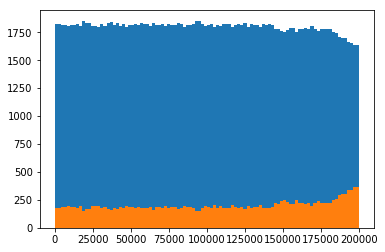

var_1


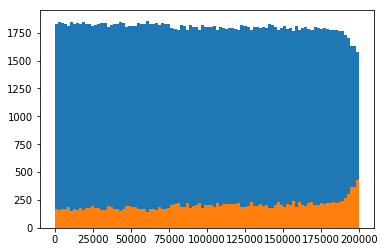

var_2


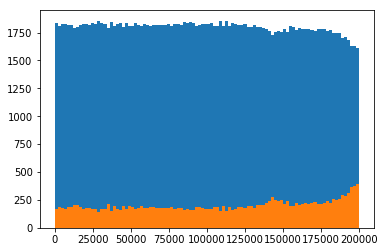

var_3


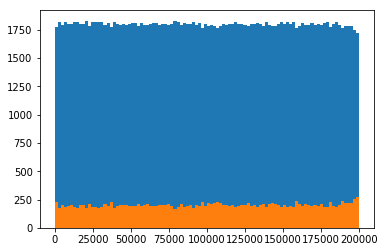

var_4


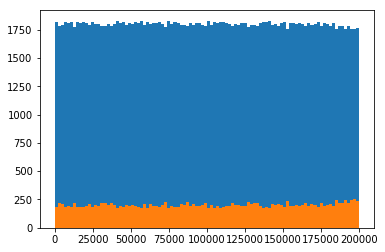

var_5


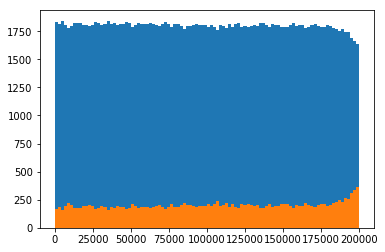

var_6


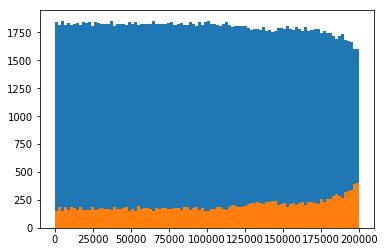

var_7


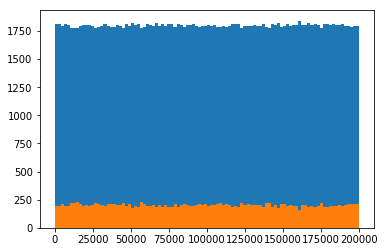

var_8


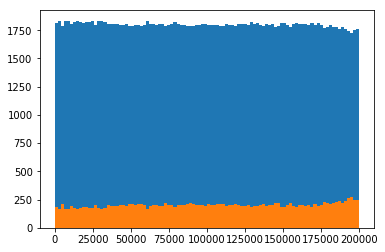

var_9


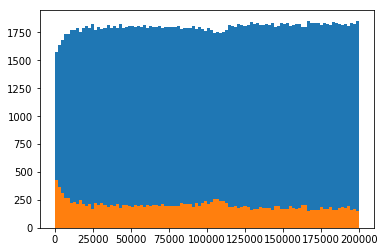

var_10


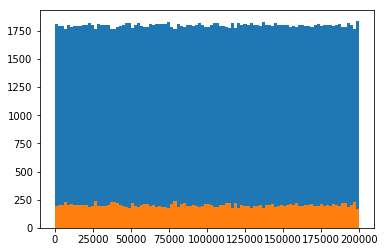

var_11


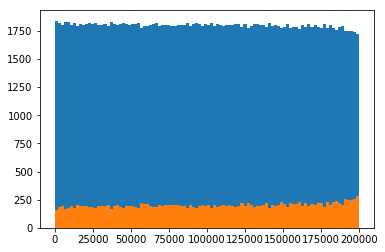

var_12


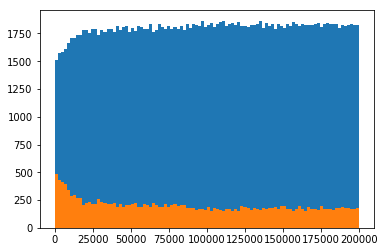

var_13


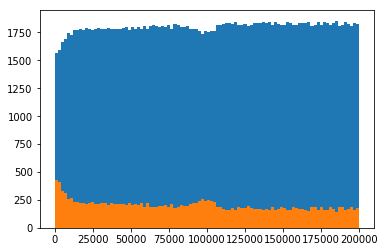

var_14


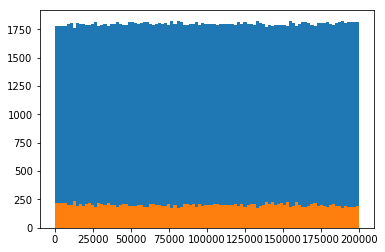

var_15


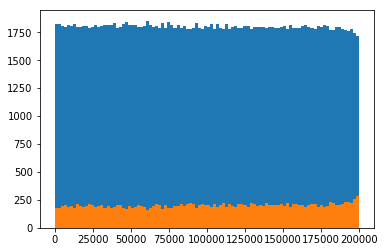

var_16


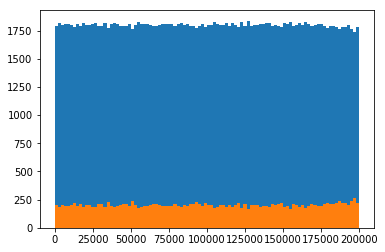

var_17


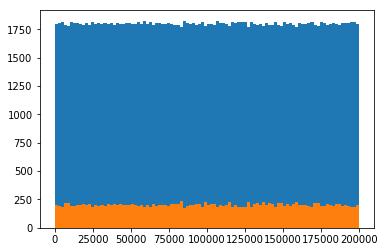

var_18


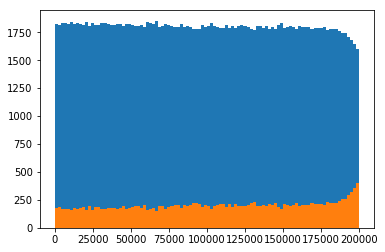

var_19


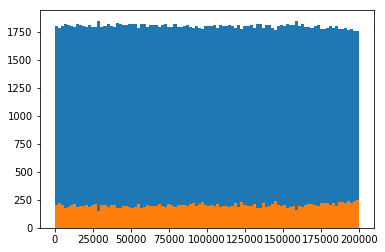

var_20


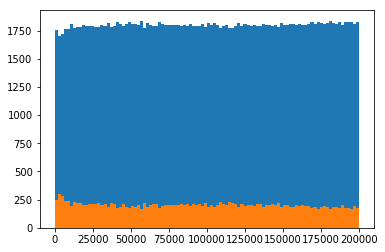

var_21


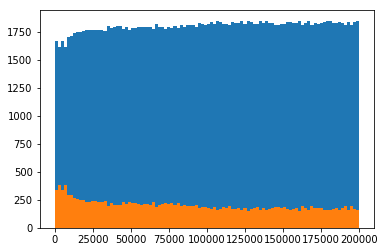

var_22


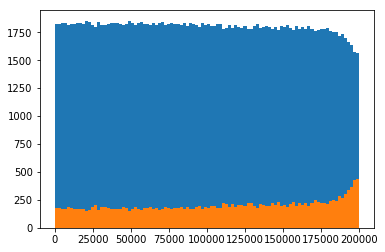

var_23


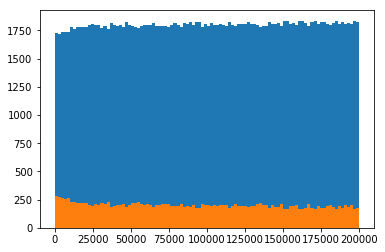

var_24


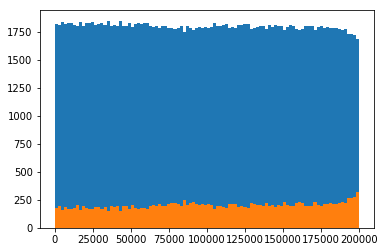

var_25


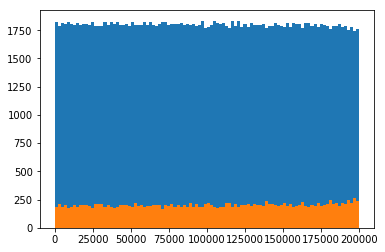

var_26


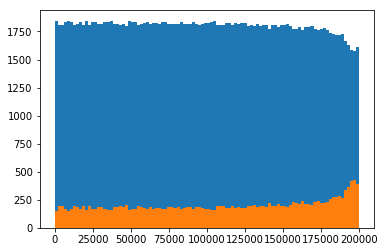

var_27


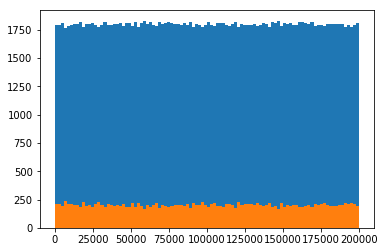

var_28


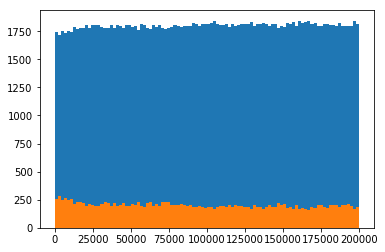

var_29


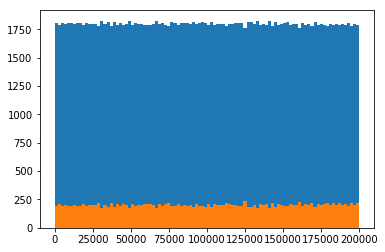

var_30


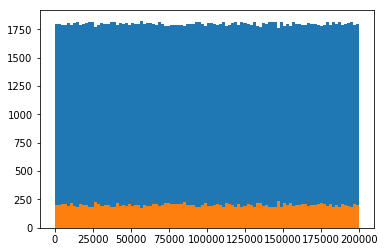

var_31


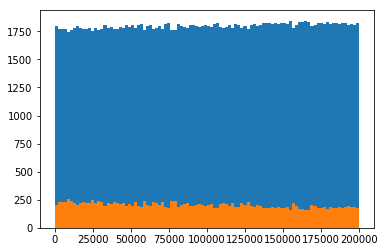

var_32


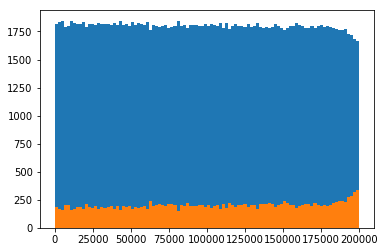

var_33


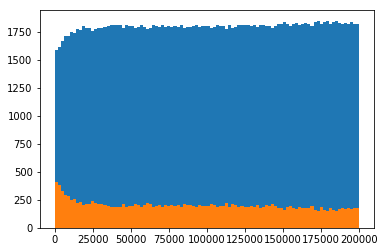

var_34


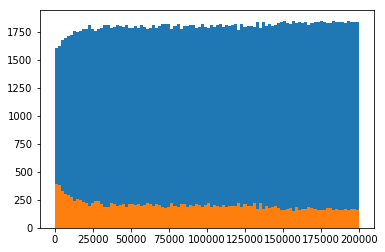

var_35


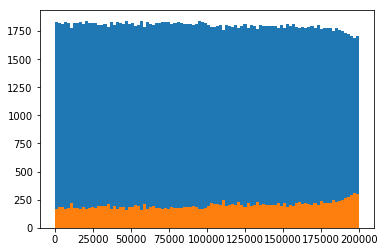

var_36


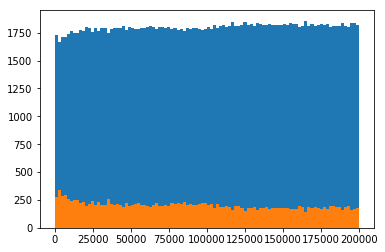

var_37


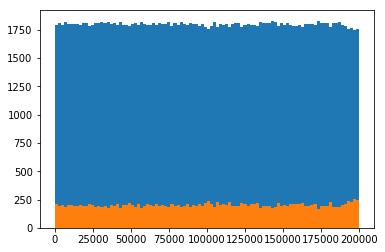

var_38


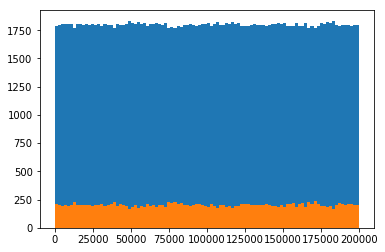

var_39


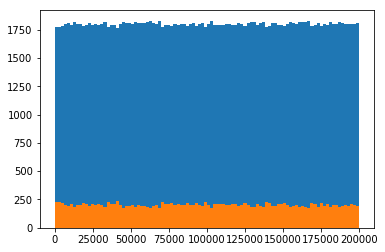

var_40


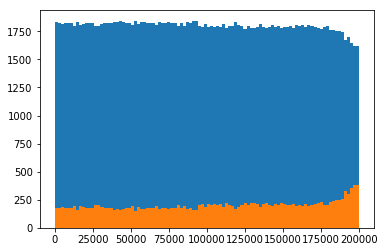

var_41


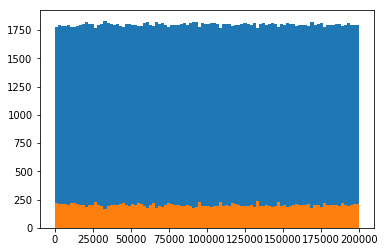

var_42


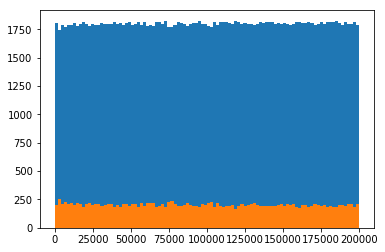

var_43


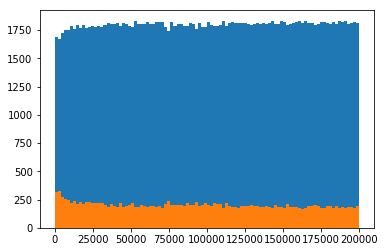

var_44


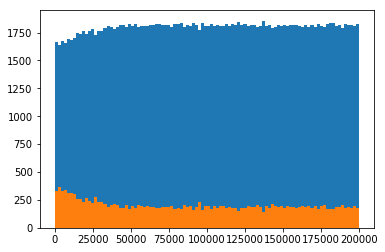

var_45


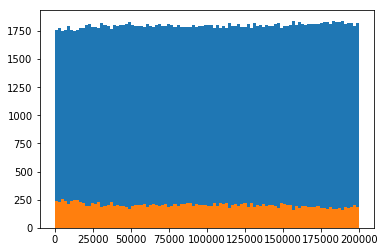

var_46


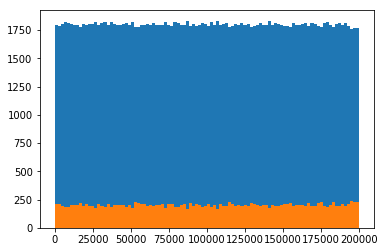

var_47


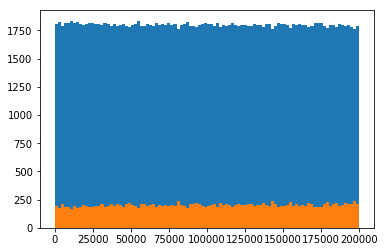

var_48


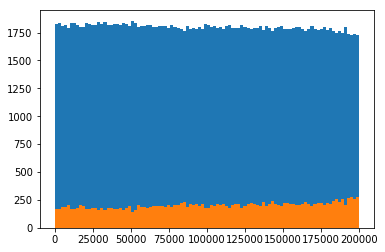

var_49


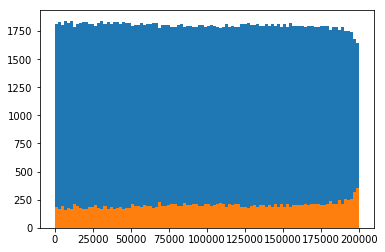

var_50


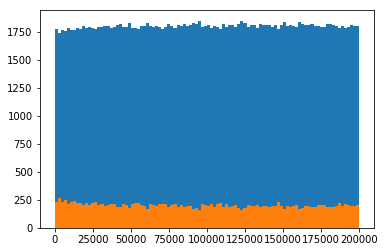

var_51


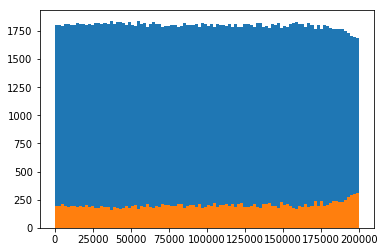

var_52


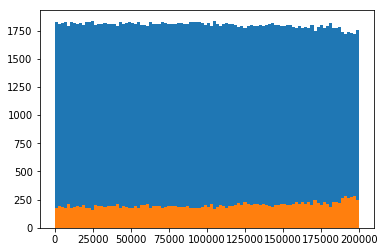

var_53


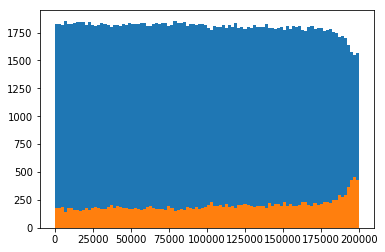

var_54


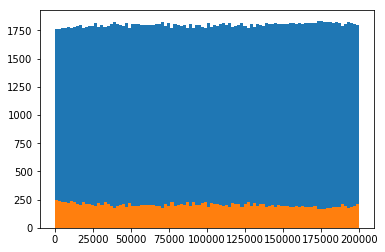

var_55


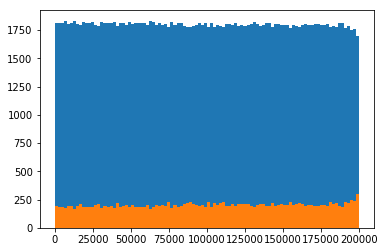

var_56


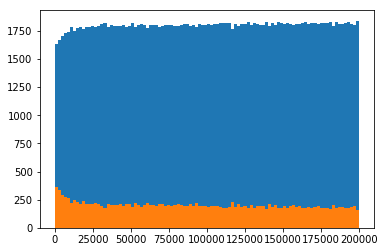

var_57


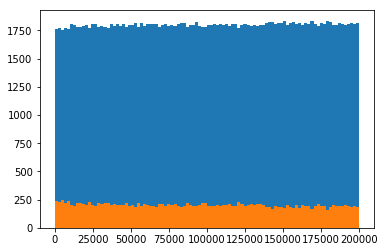

var_58


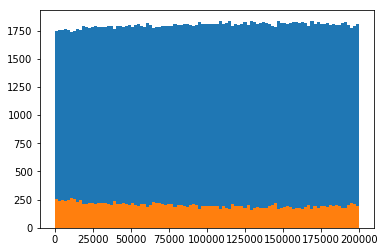

var_59


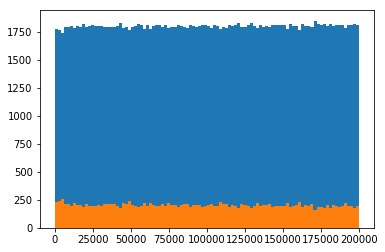

var_60


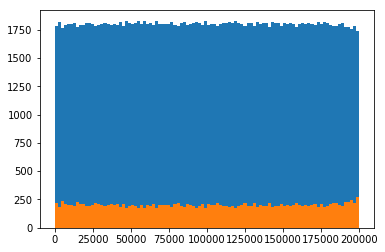

var_61


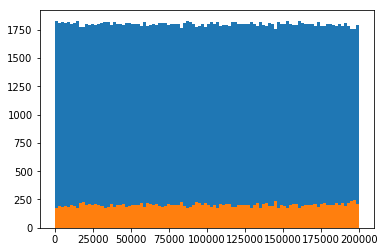

var_62


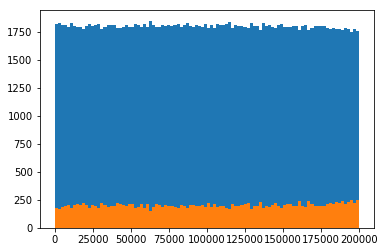

var_63


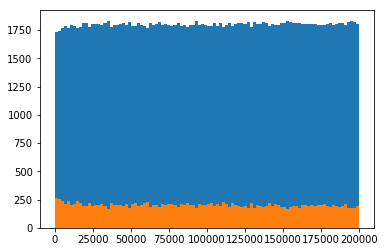

var_64


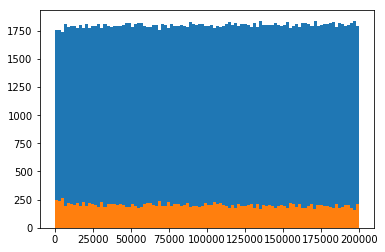

var_65


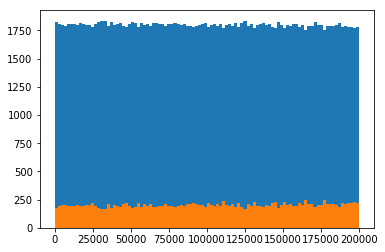

var_66


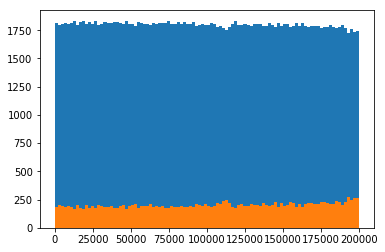

var_67


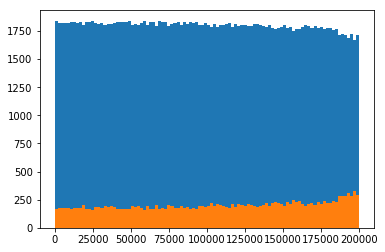

var_68


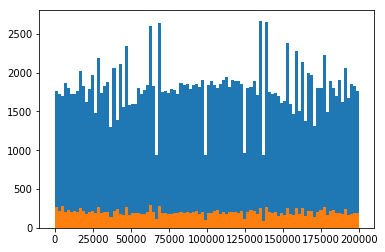

var_69


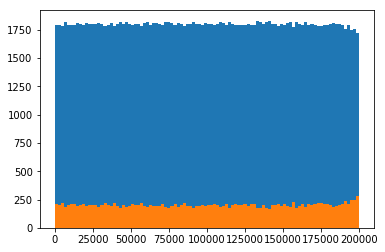

var_70


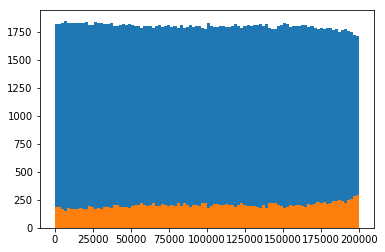

var_71


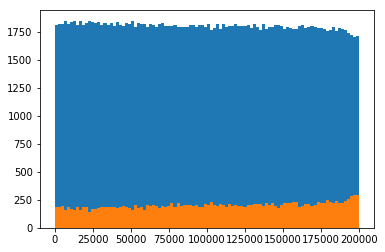

var_72


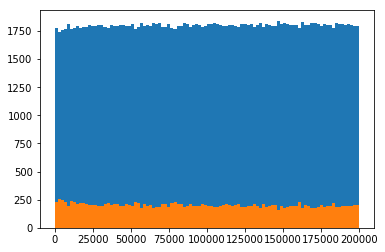

var_73


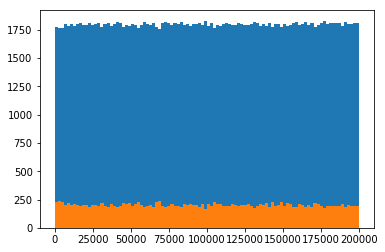

var_74


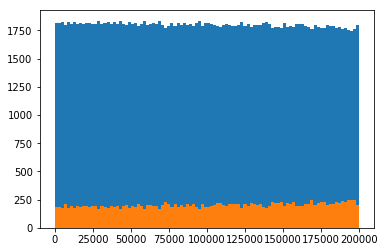

var_75


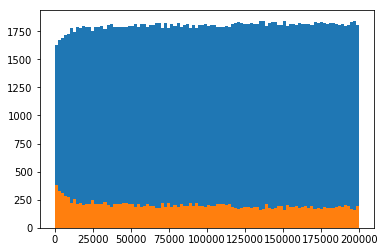

var_76


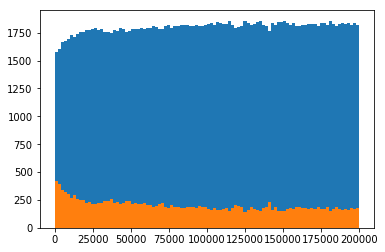

var_77


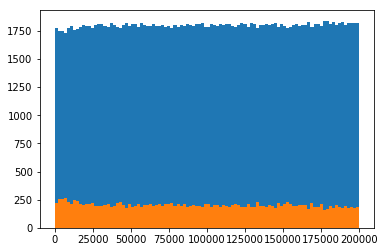

var_78


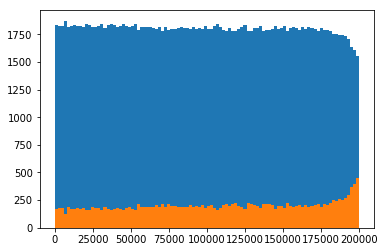

var_79


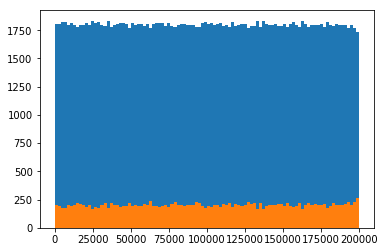

var_80


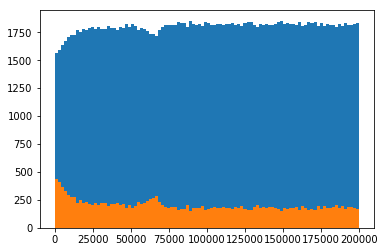

var_81


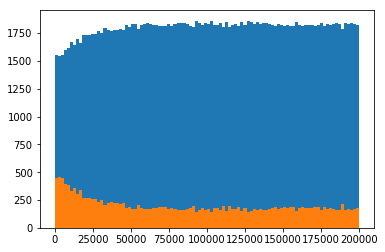

var_82


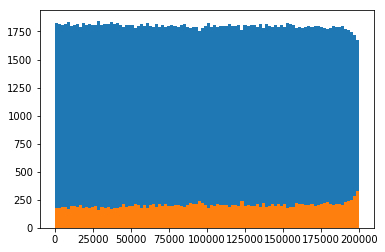

var_83


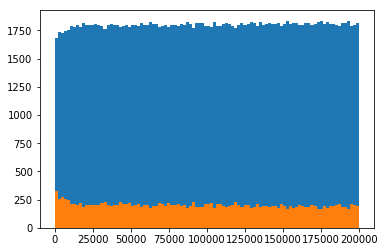

var_84


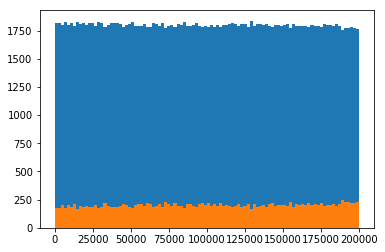

var_85


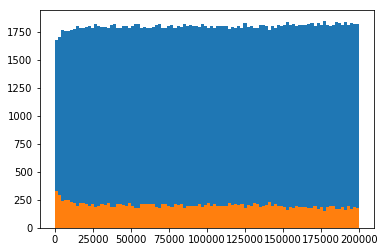

var_86


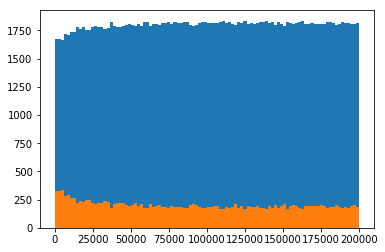

var_87


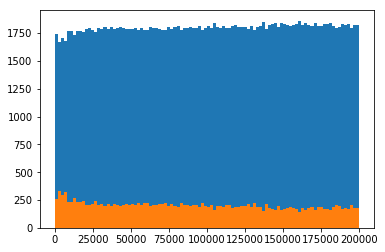

var_88


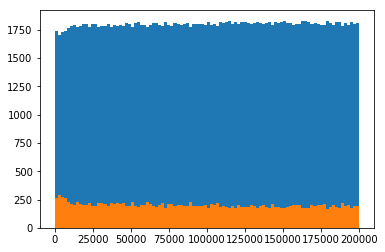

var_89


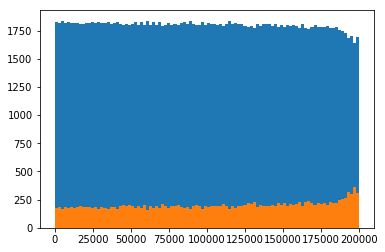

var_90


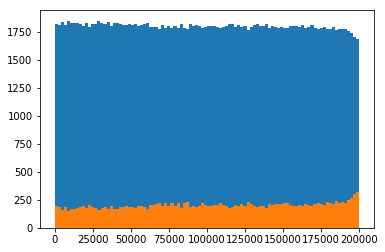

var_91


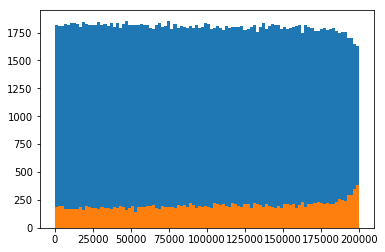

var_92


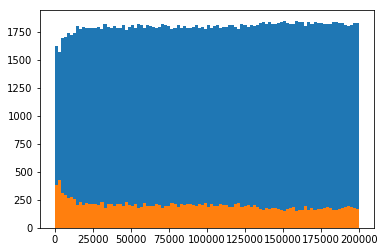

var_93


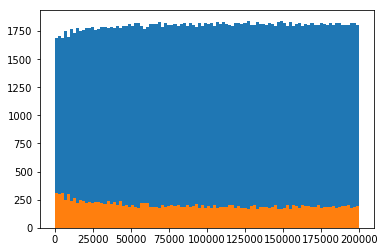

var_94


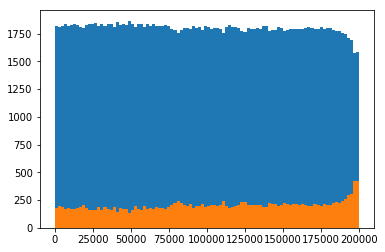

var_95


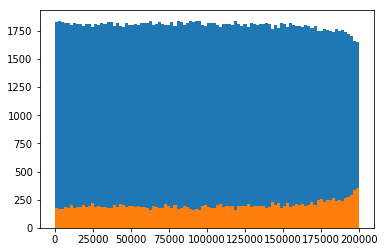

var_96


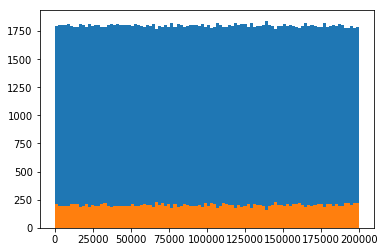

var_97


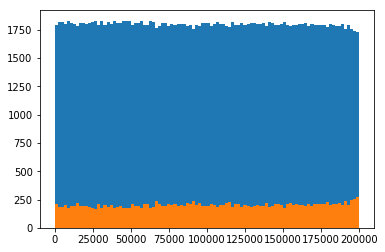

var_98


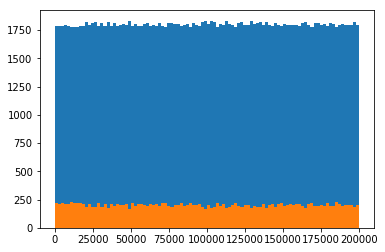

var_99


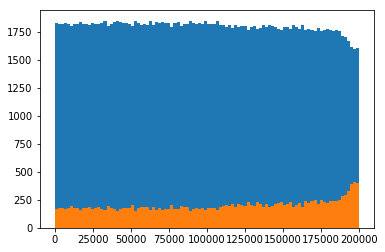

var_100


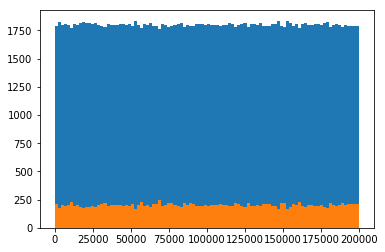

var_101


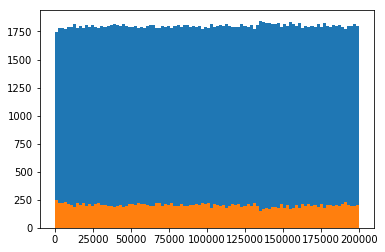

var_102


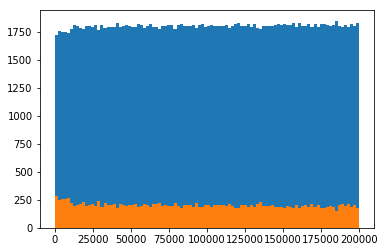

var_103


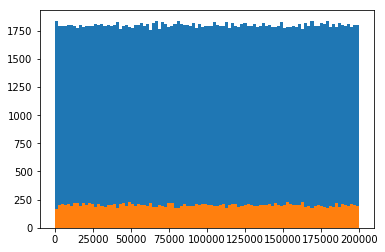

var_104


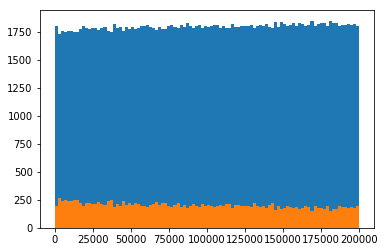

var_105


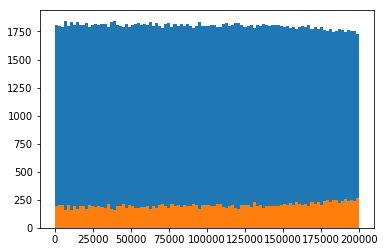

var_106


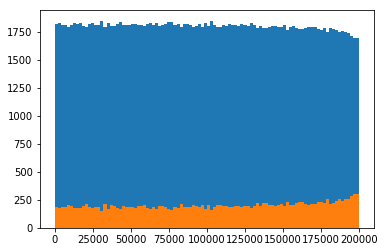

var_107


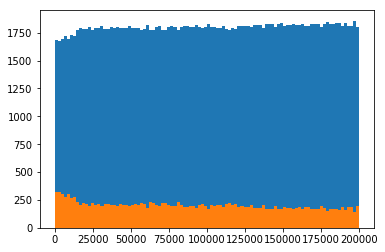

var_108


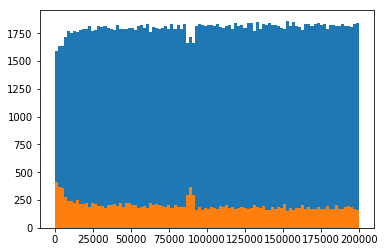

var_109


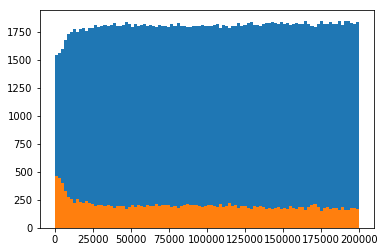

var_110


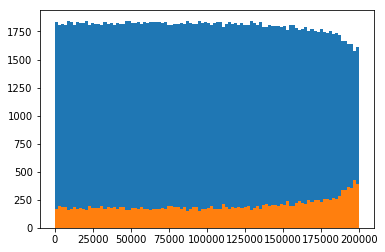

var_111


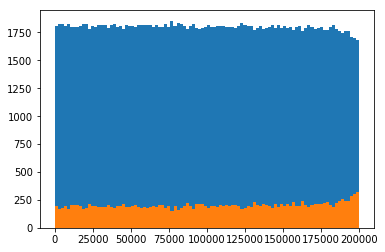

var_112


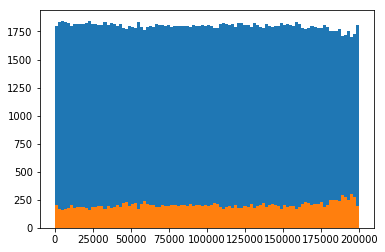

var_113


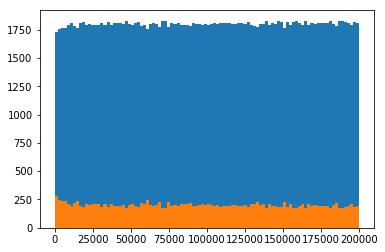

var_114


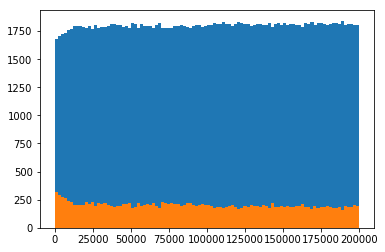

var_115


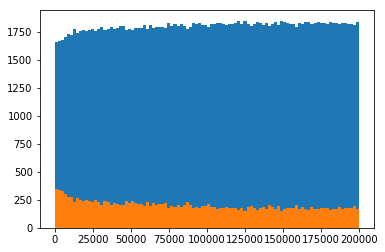

var_116


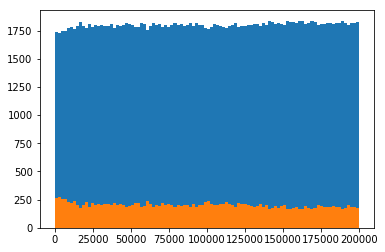

var_117


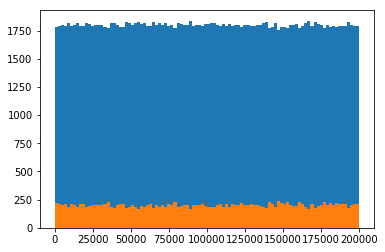

var_118


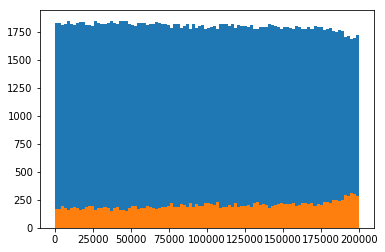

var_119


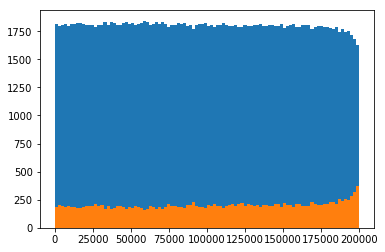

var_120


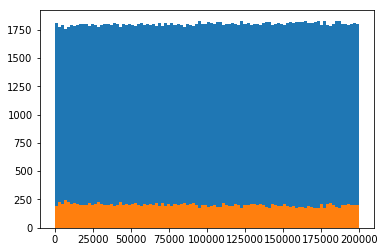

var_121


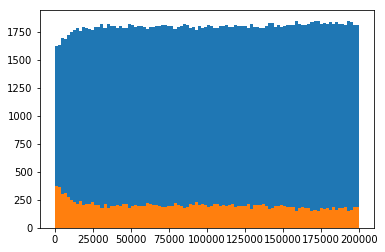

var_122


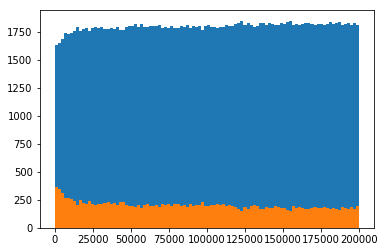

var_123


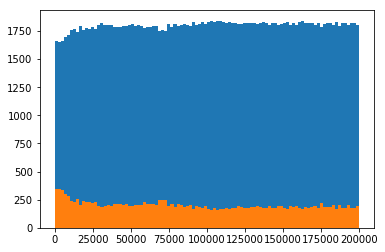

var_124


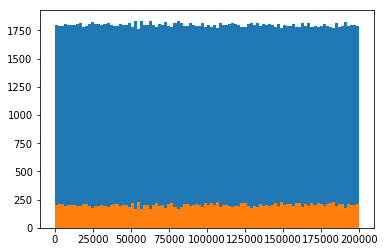

var_125


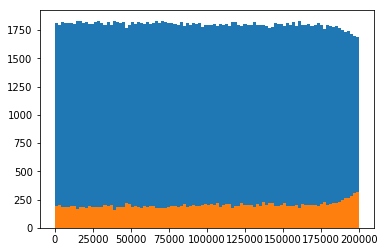

var_126


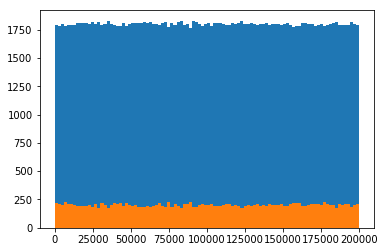

var_127


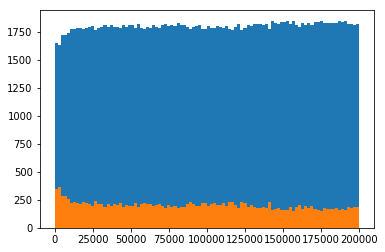

var_128


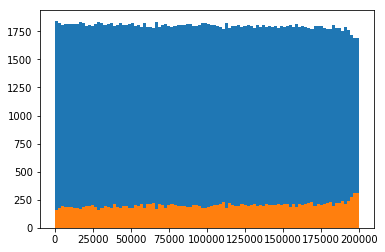

var_129


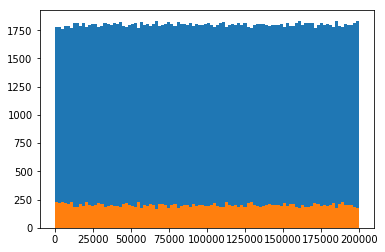

var_130


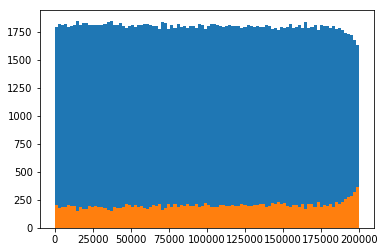

var_131


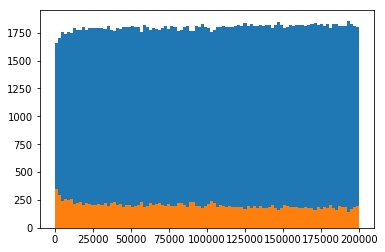

var_132


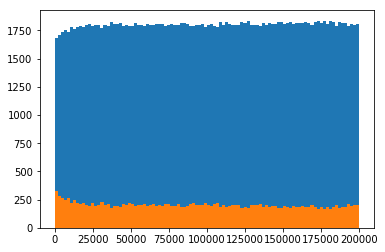

var_133


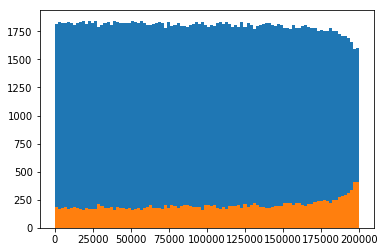

var_134


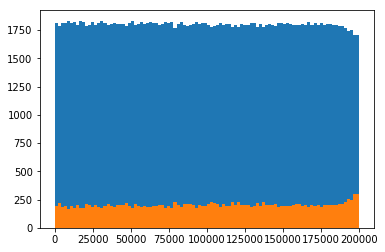

var_135


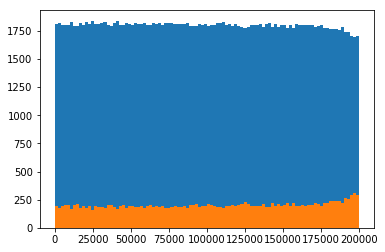

var_136


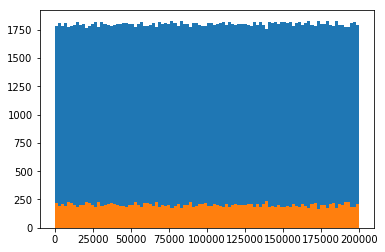

var_137


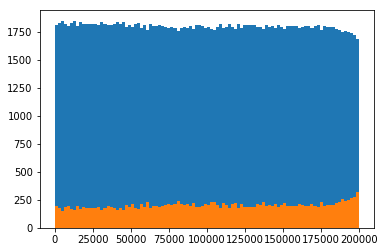

var_138


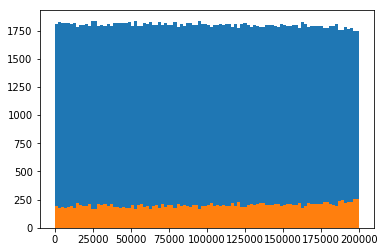

var_139


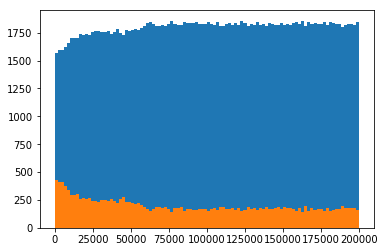

var_140


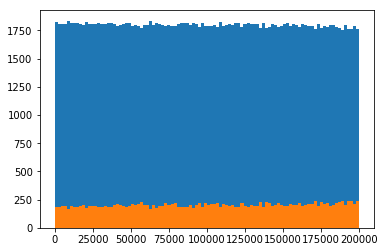

var_141


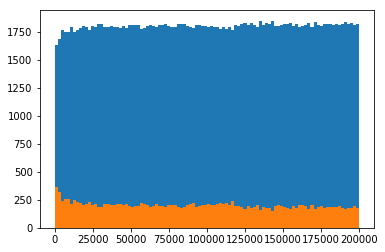

var_142


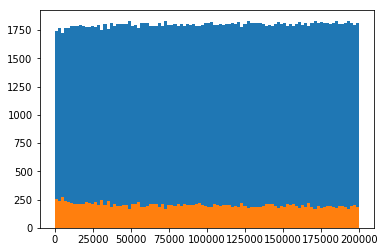

var_143


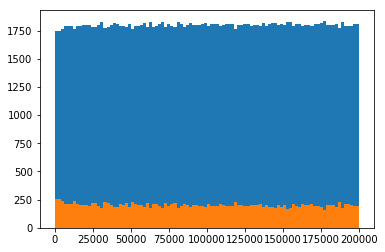

var_144


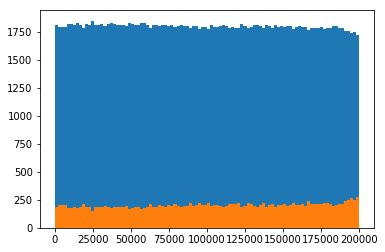

var_145


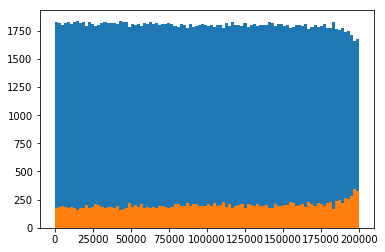

var_146


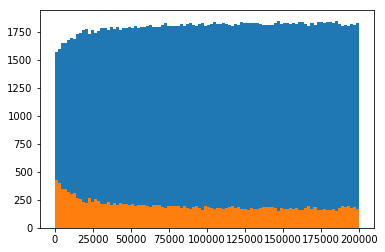

var_147


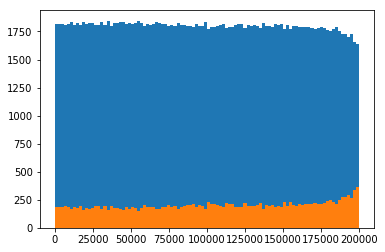

var_148


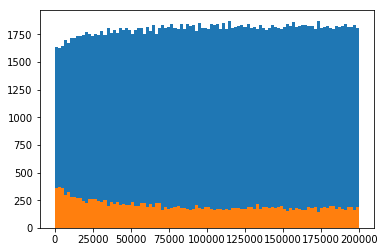

var_149


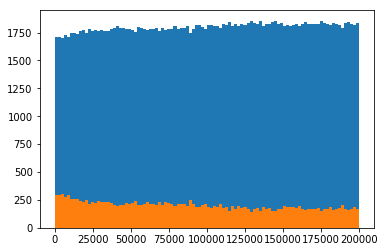

var_150


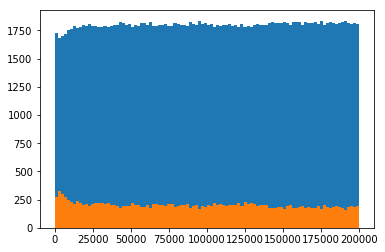

var_151


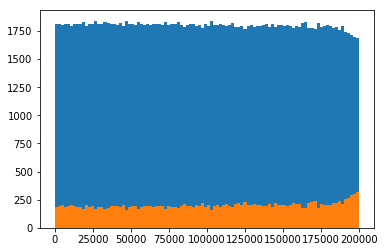

var_152


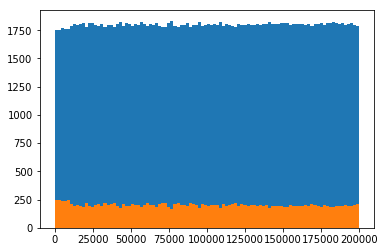

var_153


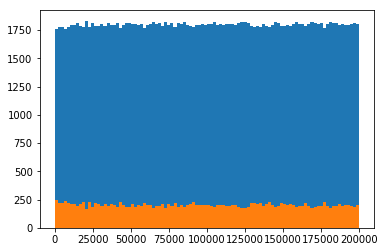

var_154


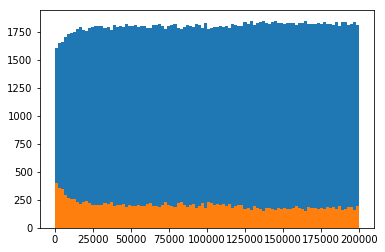

var_155


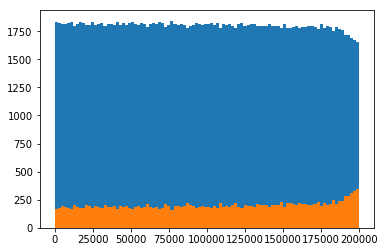

var_156


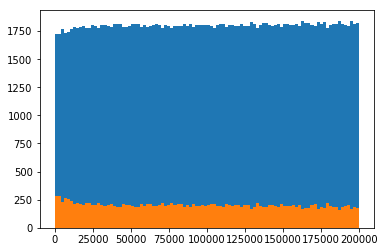

var_157


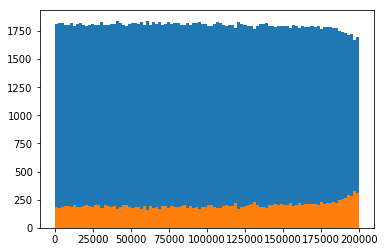

var_158


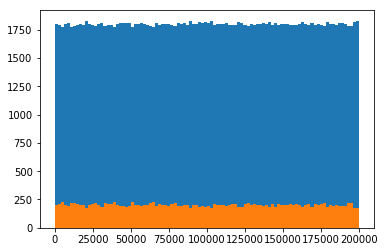

var_159


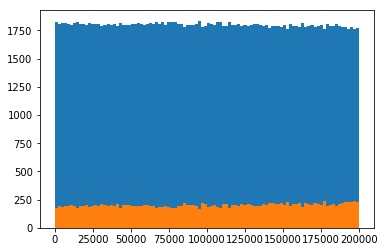

var_160


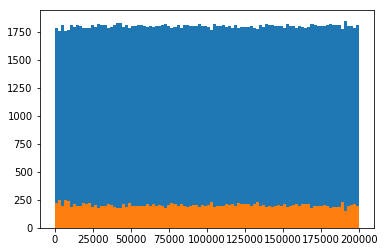

var_161


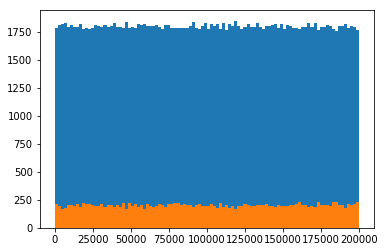

var_162


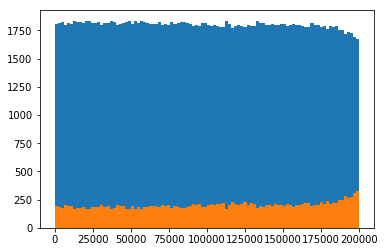

var_163


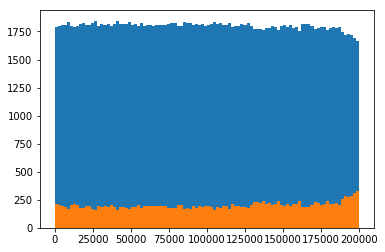

var_164


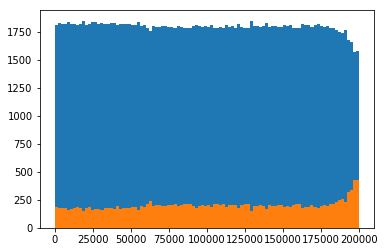

var_165


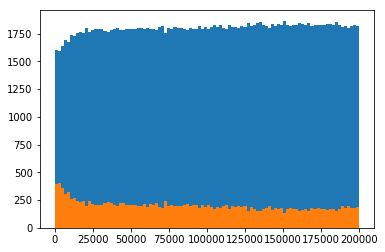

var_166


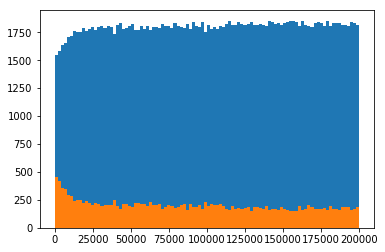

var_167


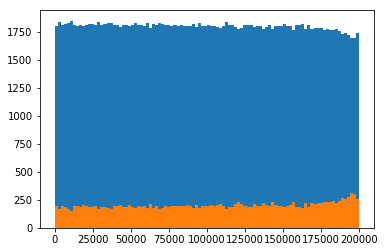

var_168


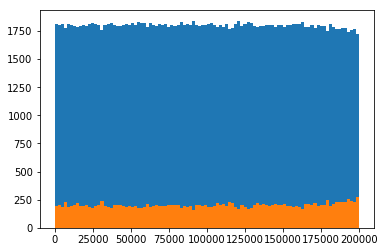

var_169


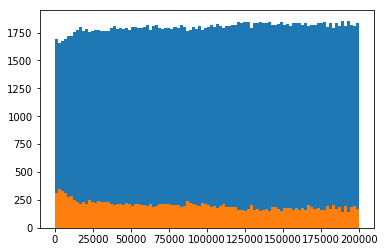

var_170


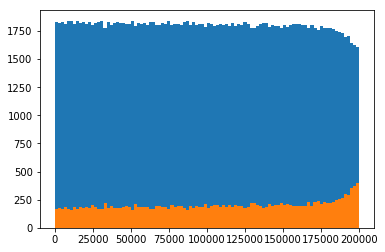

var_171


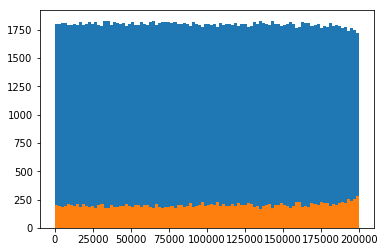

var_172


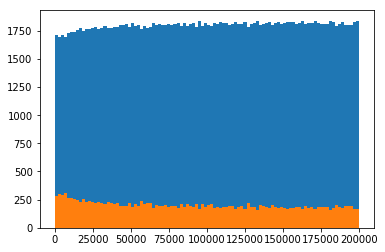

var_173


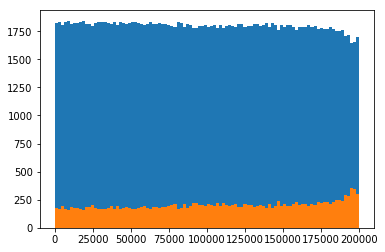

var_174


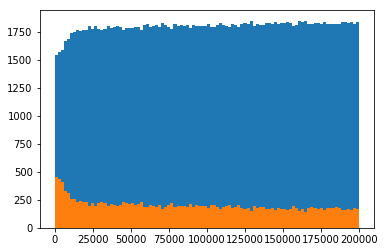

var_175


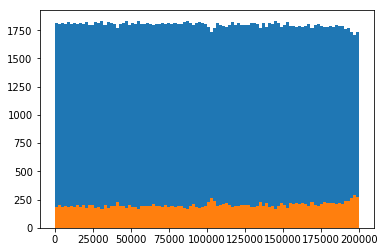

var_176


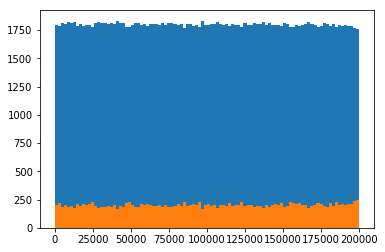

var_177


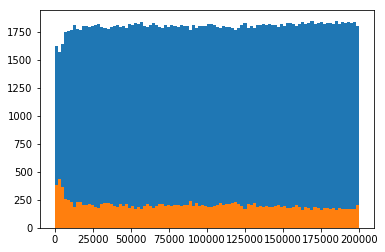

var_178


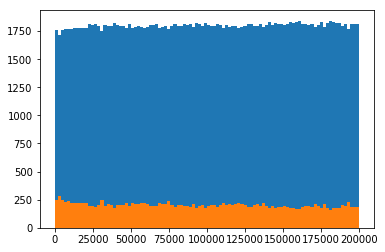

var_179


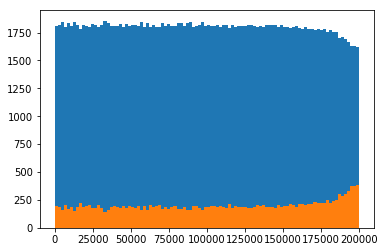

var_180


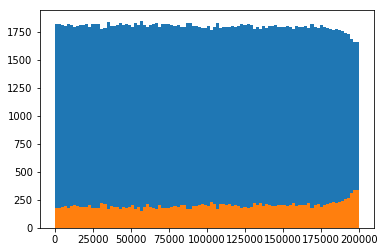

var_181


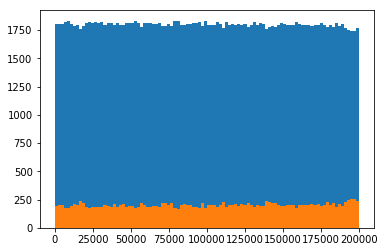

var_182


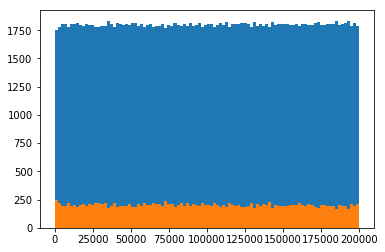

var_183


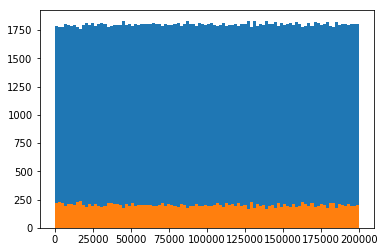

var_184


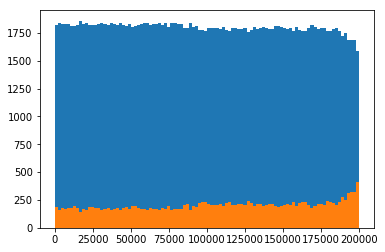

var_185


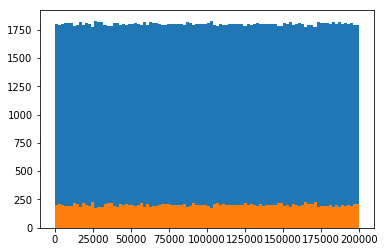

var_186


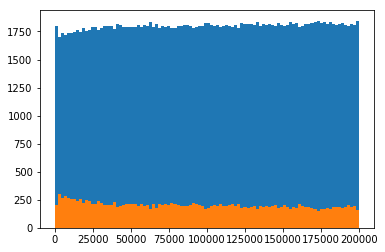

var_187


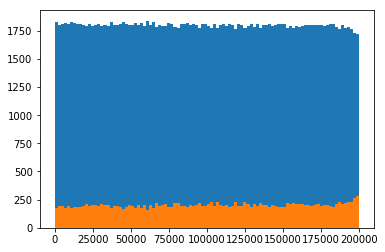

var_188


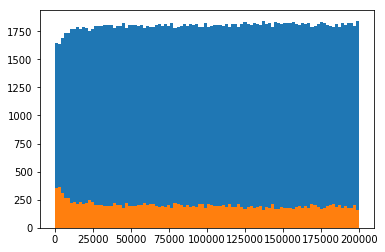

var_189


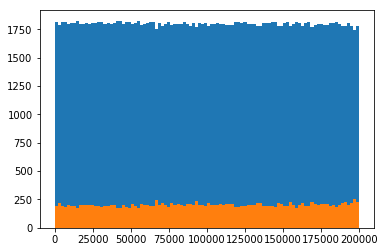

var_190


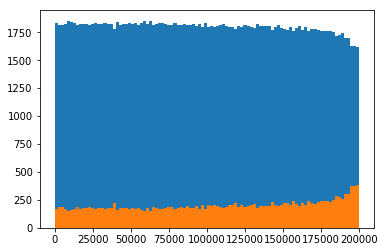

var_191


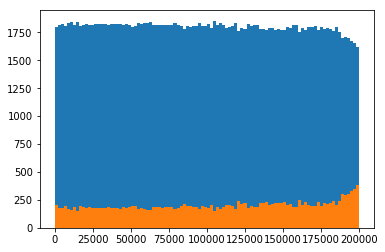

var_192


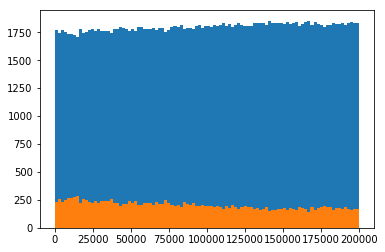

var_193


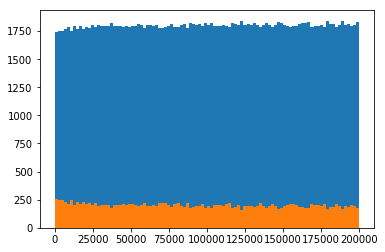

var_194


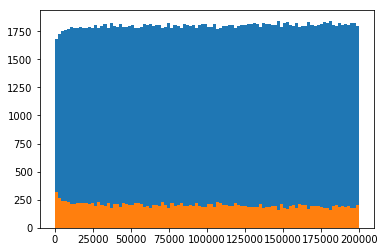

var_195


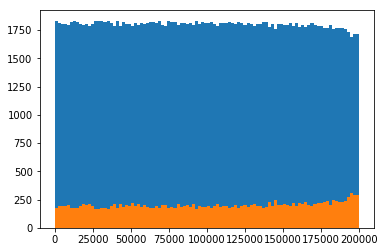

var_196


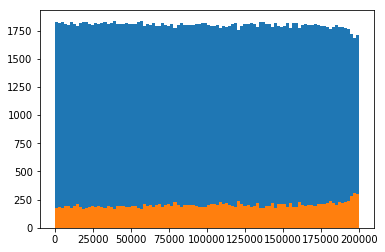

var_197


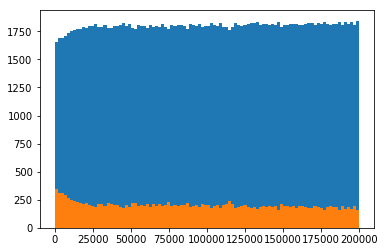

var_198


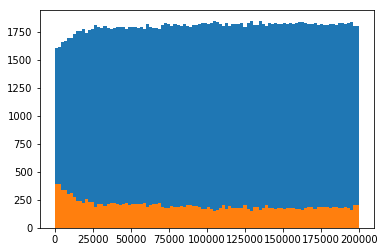

var_199


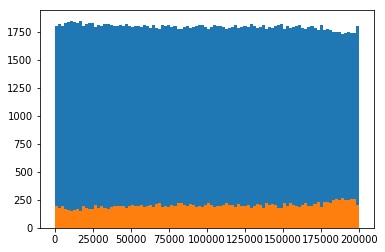

In [8]:
for col in feature_cols:
    print(col)
    plt.hist(train_0[col], bins=100)
    plt.hist(train_1[col], bins=100)
    plt.show()

### Observe count-ranking distributions group by target

In [13]:
from sklearn.preprocessing import LabelEncoder

train_cp = train[feature_cols].copy()
test_cp = test[feature_cols].copy()

for col in tqdm(feature_cols):
    vc = train_cp[col].append(test_cp[col]).value_counts()
    vc = pd.Series(index=vc.index, data=LabelEncoder().fit_transform(vc)) # encode with frequency
    
    train_cp[col] = train_cp[col].map(vc)
    test_cp[col] = test_cp[col].map(vc)
    
train_0 = train_cp.loc[train.target==0, feature_cols].reset_index(drop=True)
train_1 = train_cp.loc[train.target==1, feature_cols].reset_index(drop=True)

100%|████████████████████████████████████████████████████████████████████████████| 200/200 [00:44<00:00, 13.11it/s]


var_0


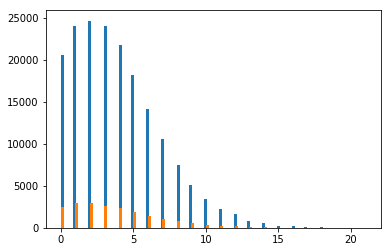

var_1


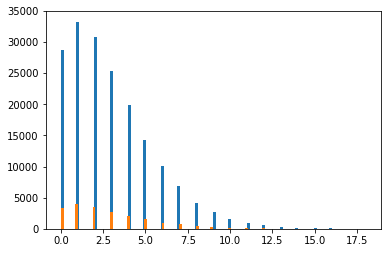

var_2


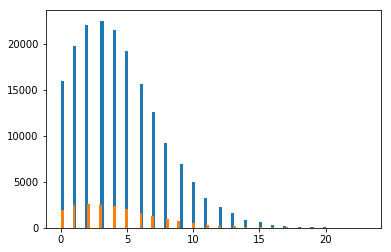

var_3


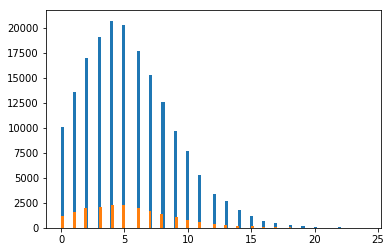

var_4


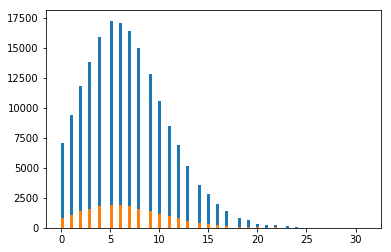

var_5


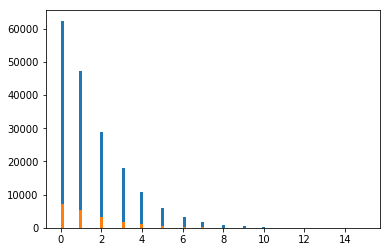

var_6


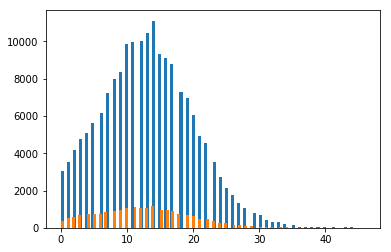

var_7


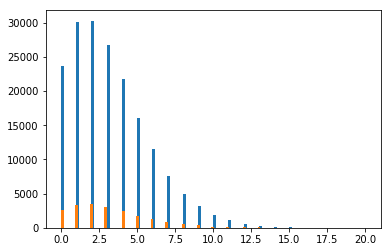

var_8


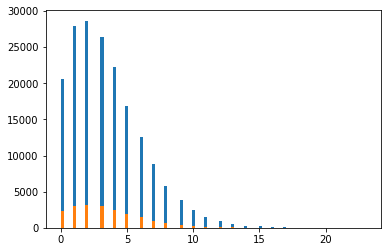

var_9


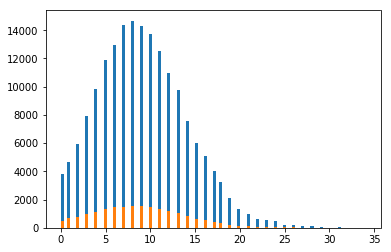

var_10


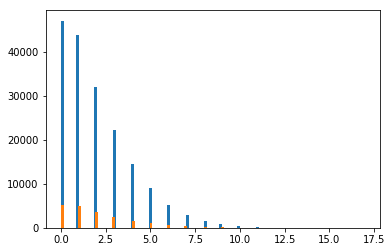

var_11


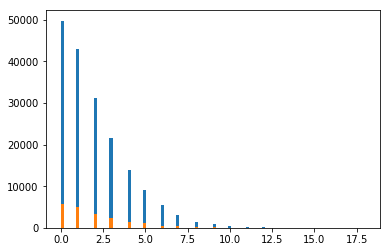

var_12


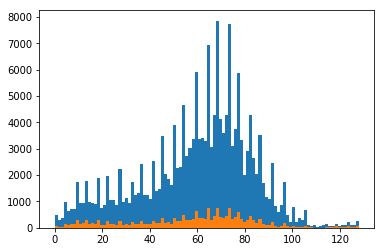

var_13


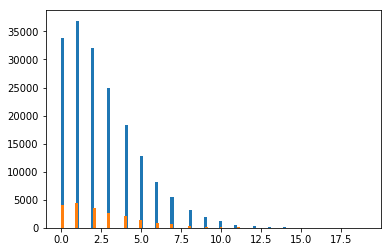

var_14


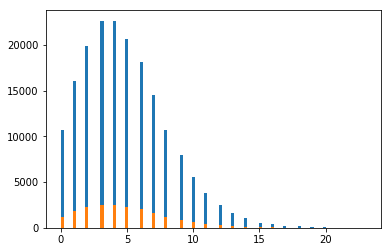

var_15


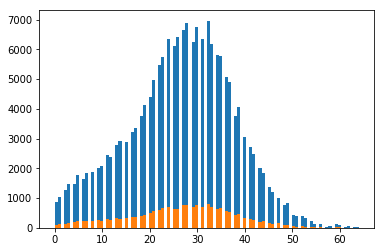

var_16


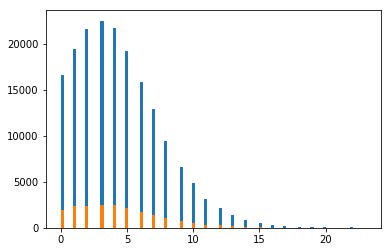

var_17


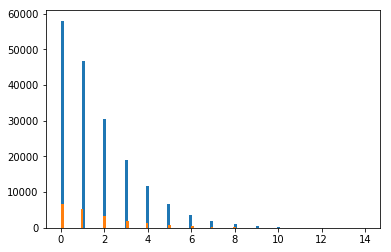

var_18


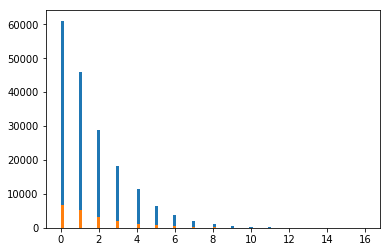

var_19


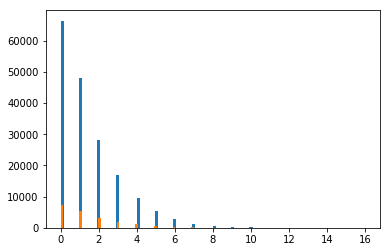

var_20


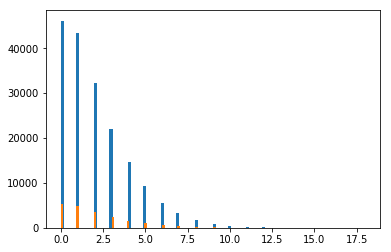

var_21


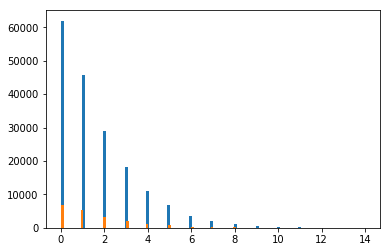

var_22


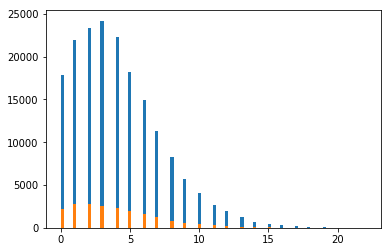

var_23


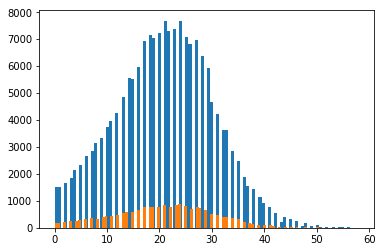

var_24


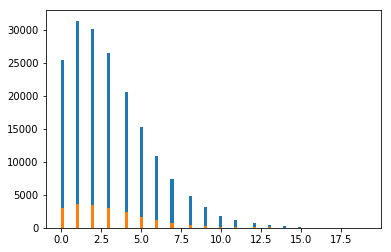

var_25


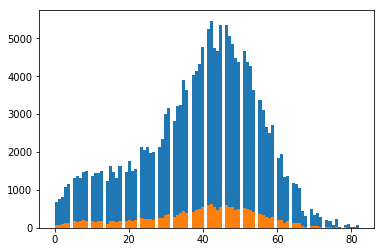

var_26


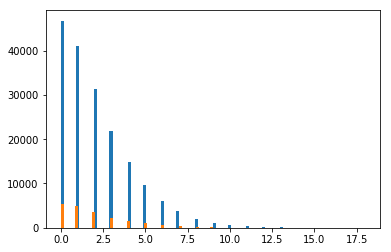

var_27


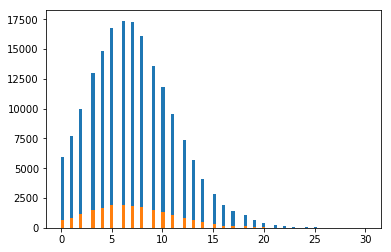

var_28


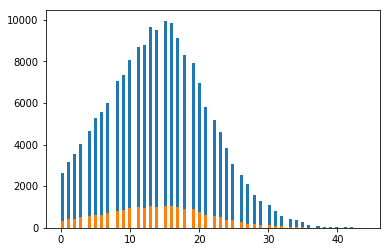

var_29


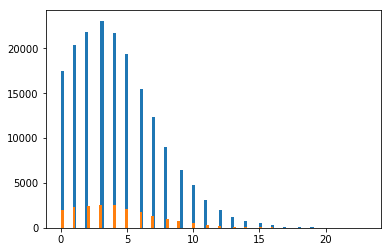

var_30


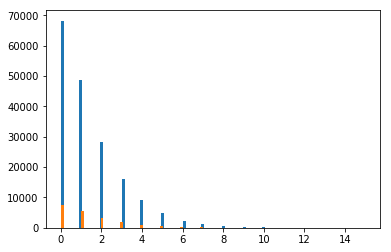

var_31


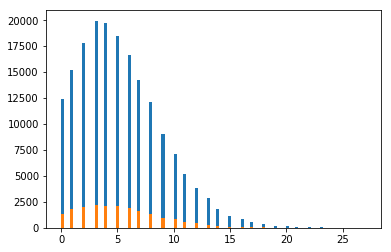

var_32


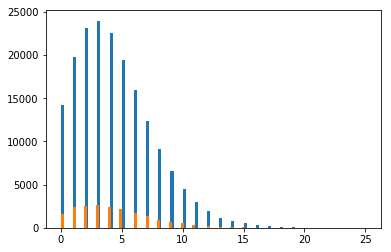

var_33


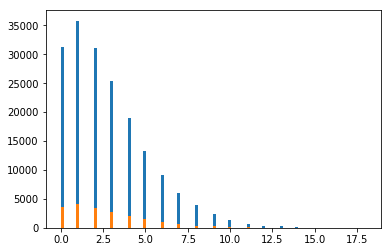

var_34


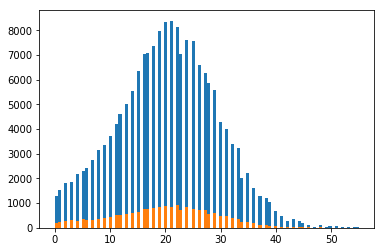

var_35


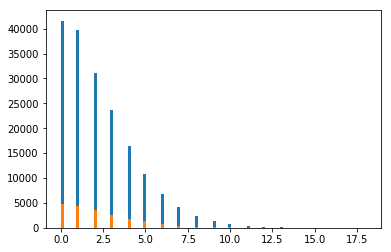

var_36


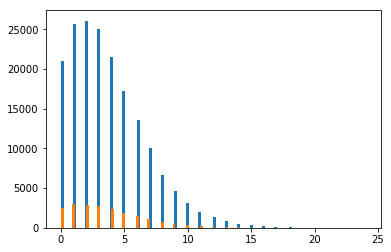

var_37


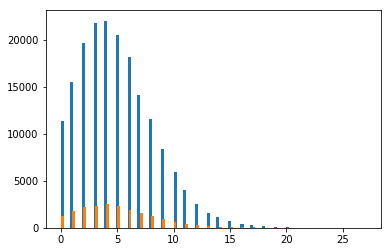

var_38


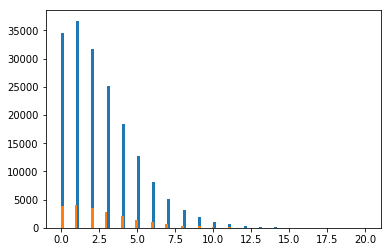

var_39


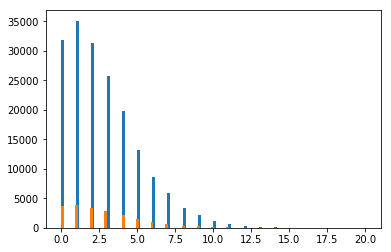

var_40


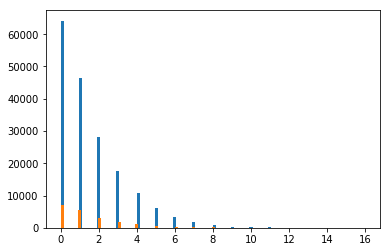

var_41


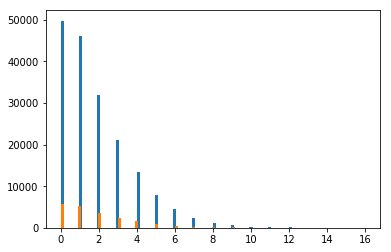

var_42


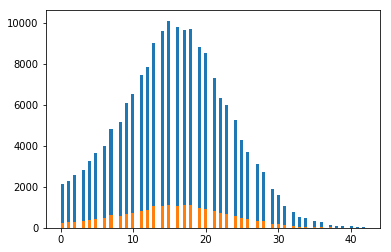

var_43


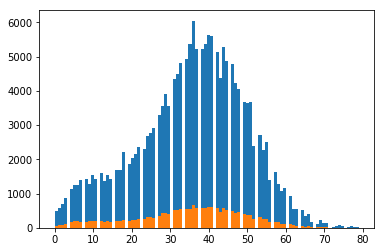

var_44


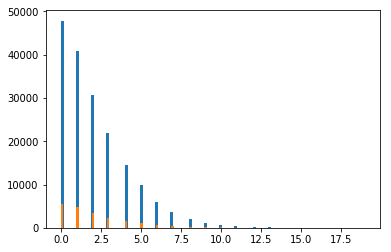

var_45


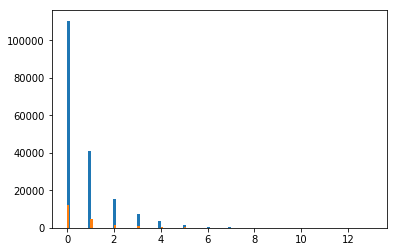

var_46


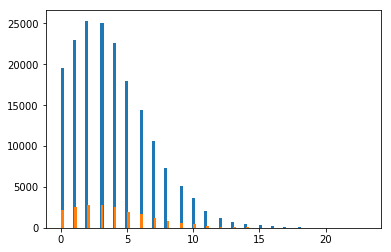

var_47


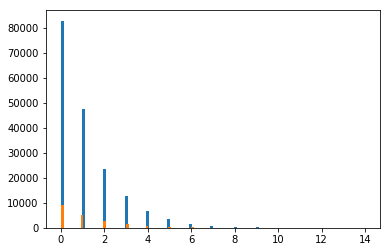

var_48


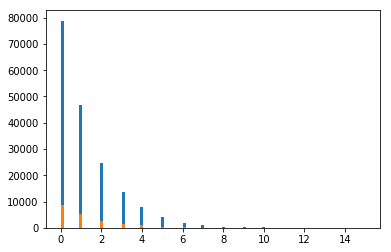

var_49


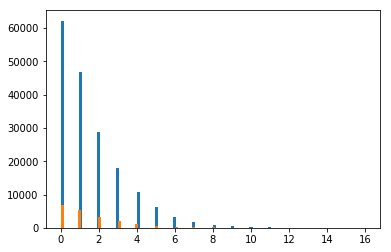

var_50


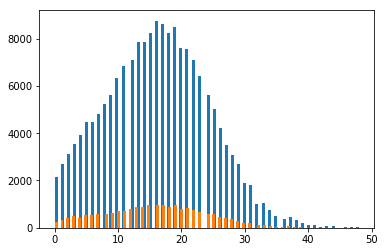

var_51


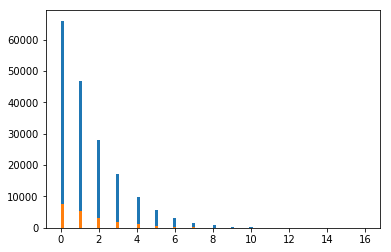

var_52


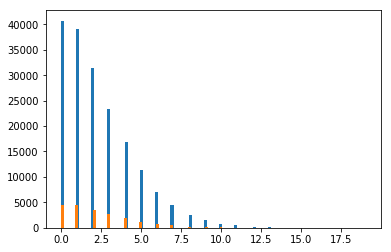

var_53


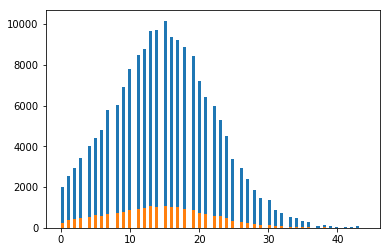

var_54


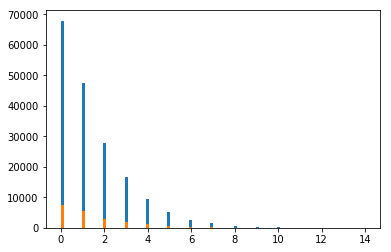

var_55


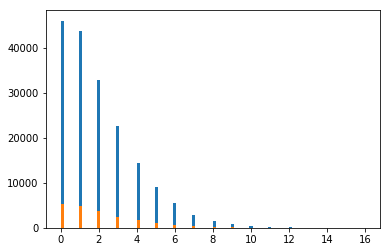

var_56


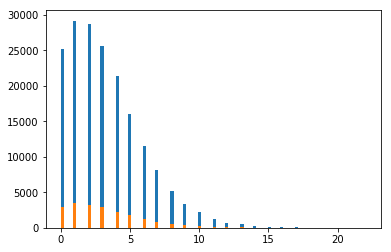

var_57


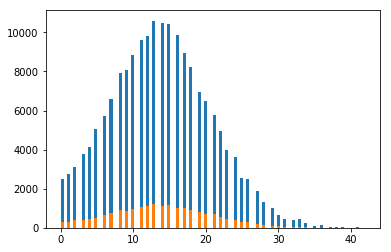

var_58


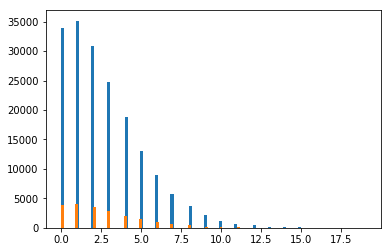

var_59


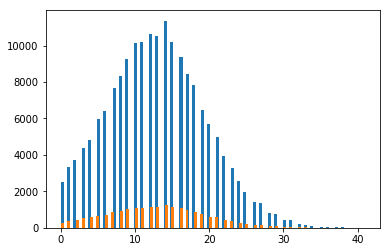

var_60


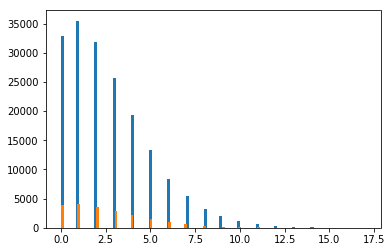

var_61


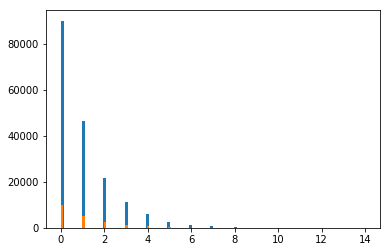

var_62


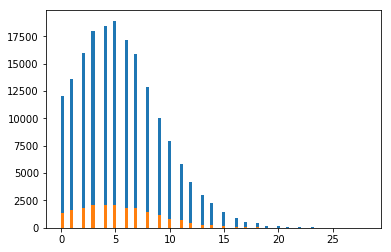

var_63


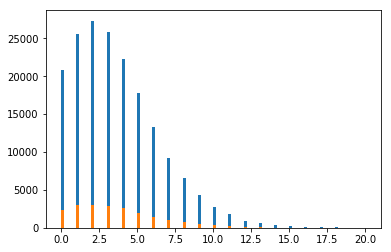

var_64


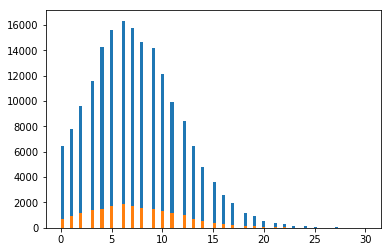

var_65


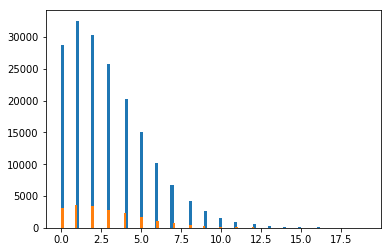

var_66


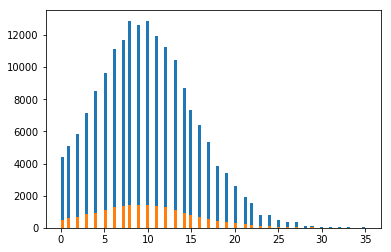

var_67


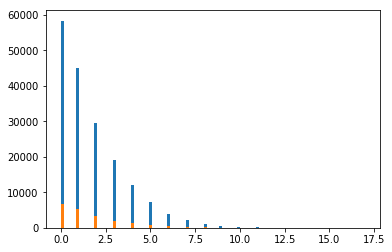

var_68


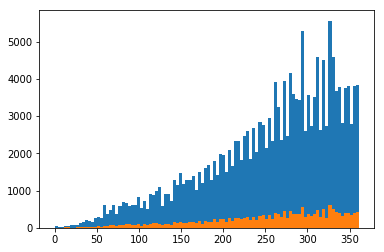

var_69


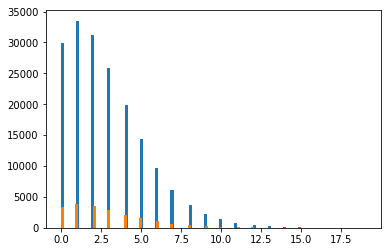

var_70


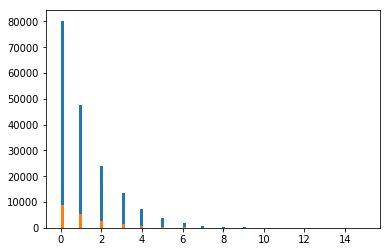

var_71


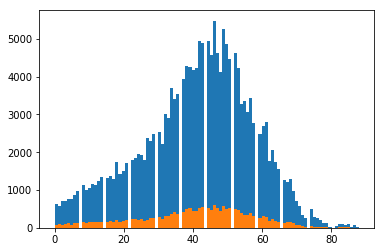

var_72


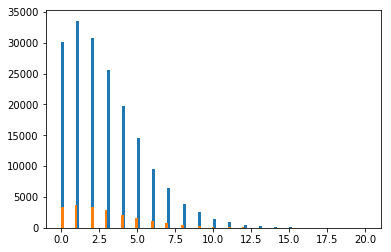

var_73


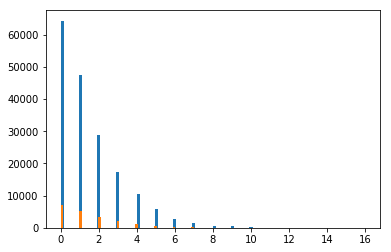

var_74


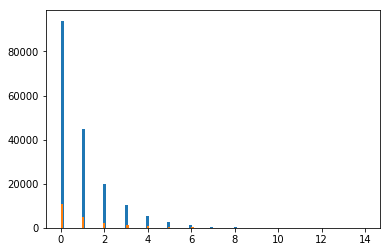

var_75


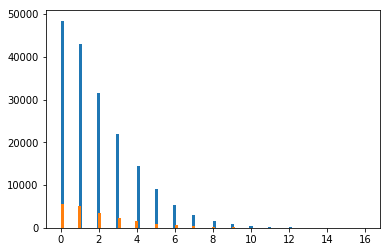

var_76


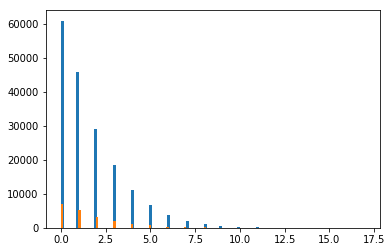

var_77


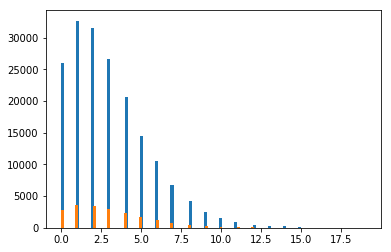

var_78


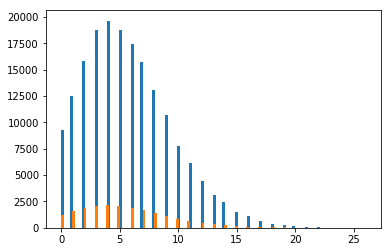

var_79


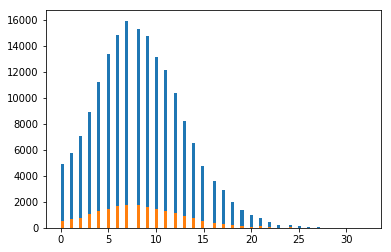

var_80


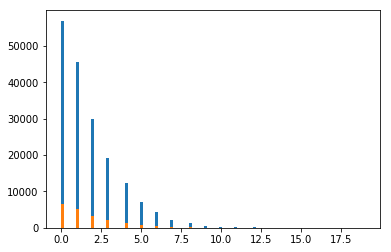

var_81


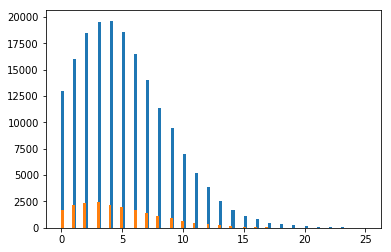

var_82


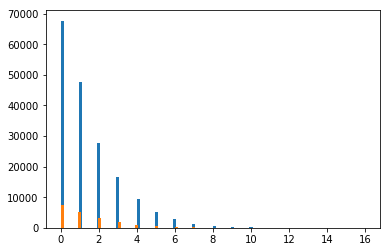

var_83


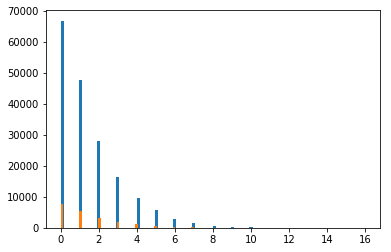

var_84


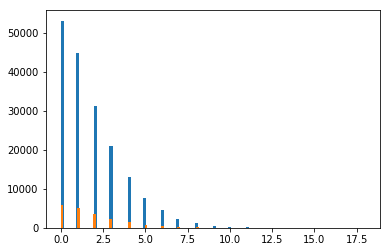

var_85


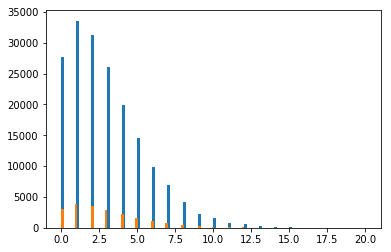

var_86


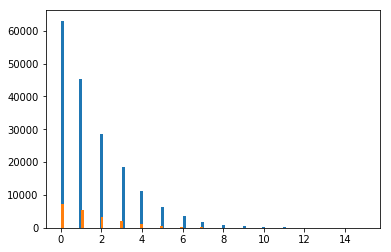

var_87


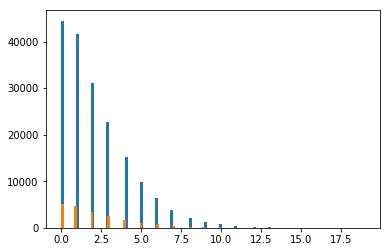

var_88


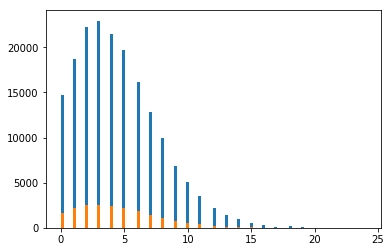

var_89


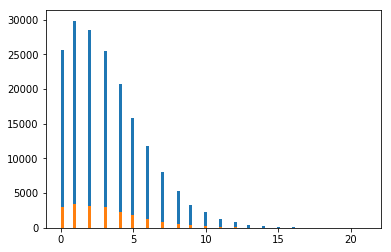

var_90


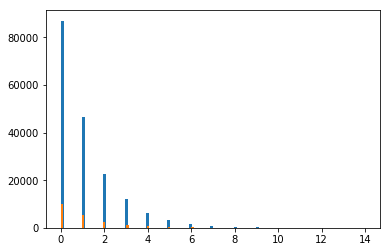

var_91


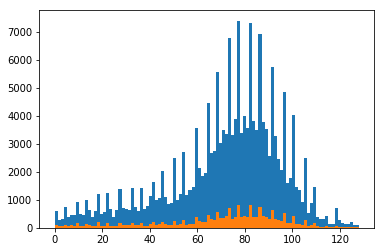

var_92


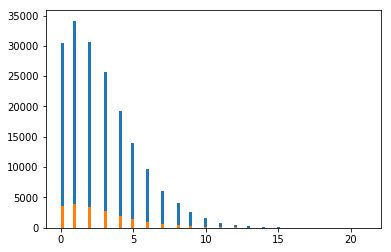

var_93


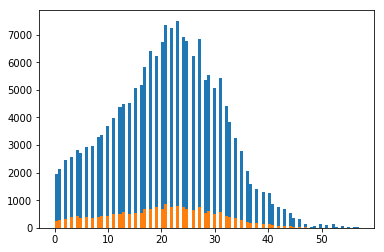

var_94


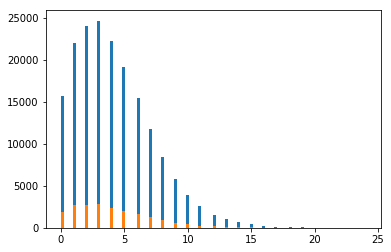

var_95


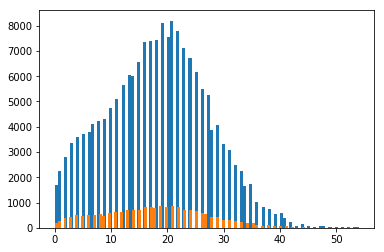

var_96


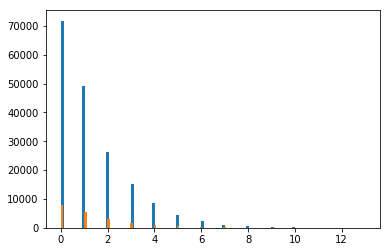

var_97


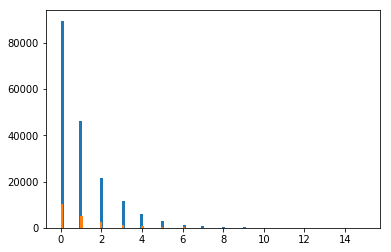

var_98


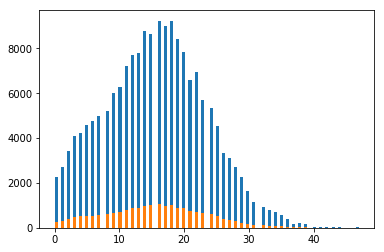

var_99


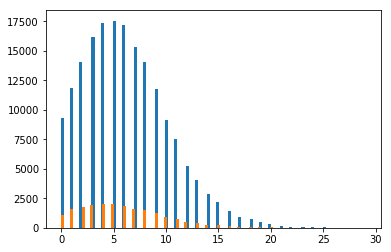

var_100


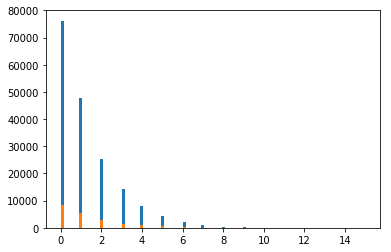

var_101


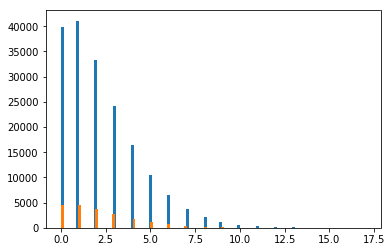

var_102


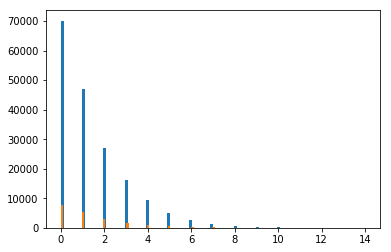

var_103


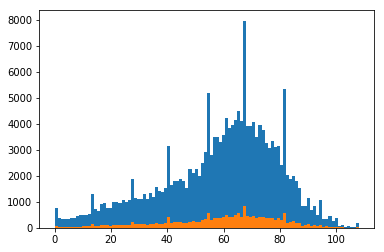

var_104


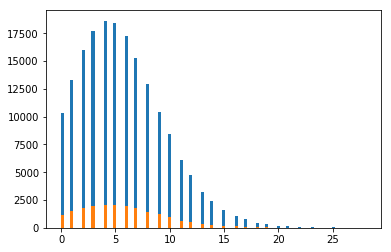

var_105


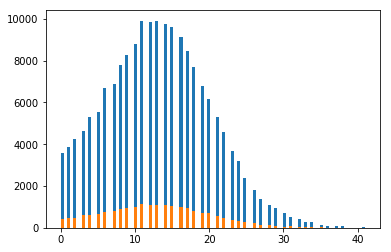

var_106


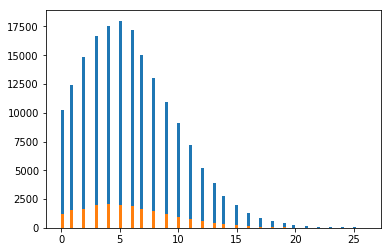

var_107


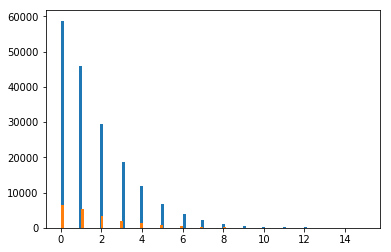

var_108


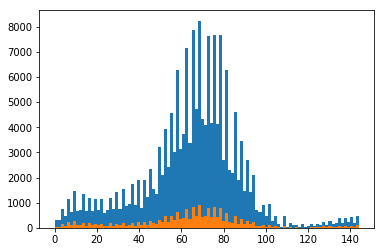

var_109


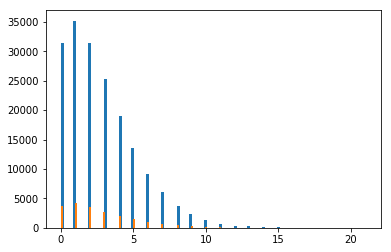

var_110


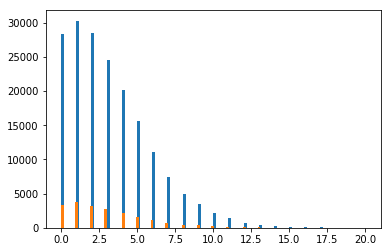

var_111


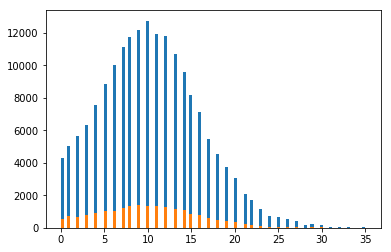

var_112


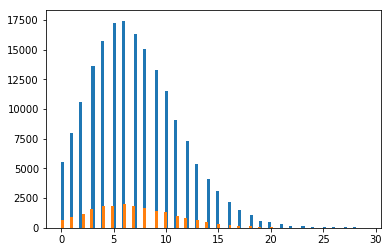

var_113


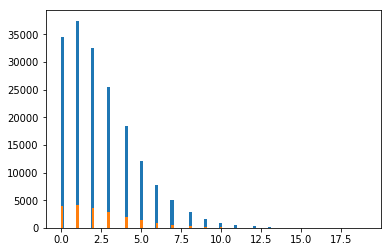

var_114


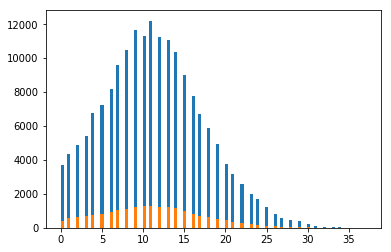

var_115


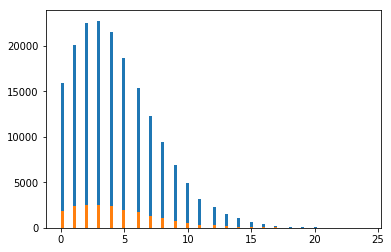

var_116


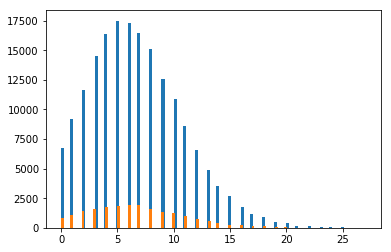

var_117


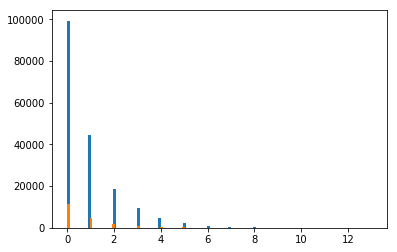

var_118


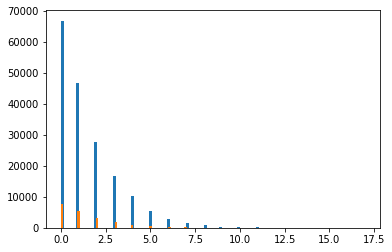

var_119


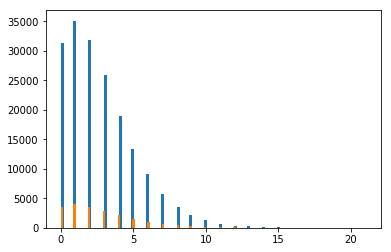

var_120


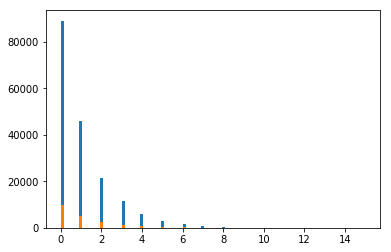

var_121


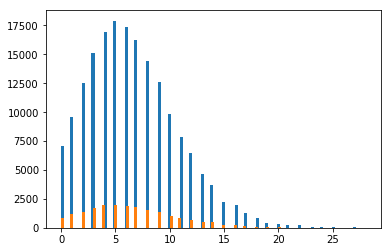

var_122


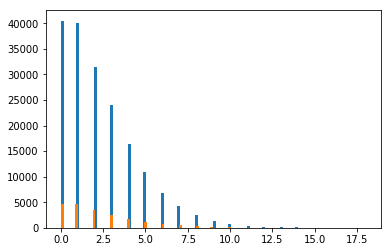

var_123


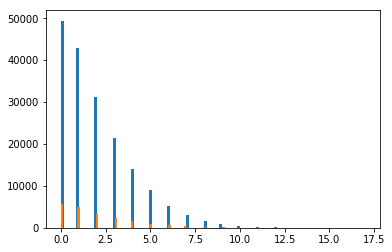

var_124


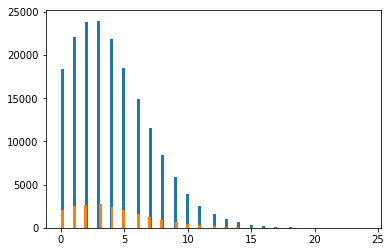

var_125


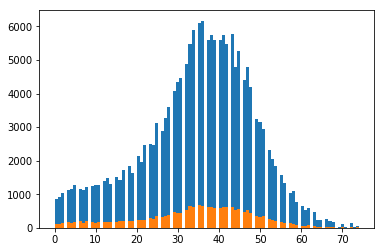

var_126


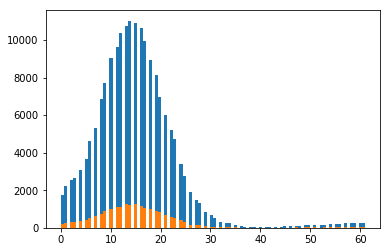

var_127


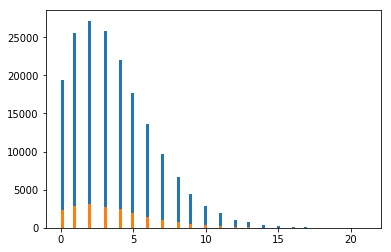

var_128


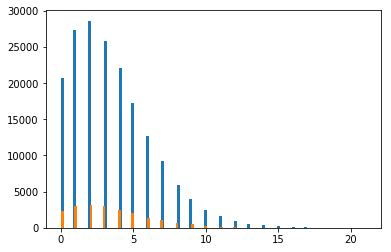

var_129


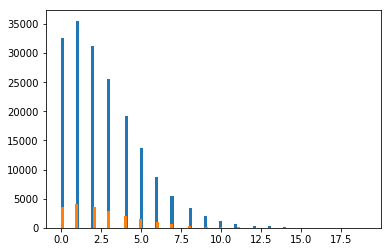

var_130


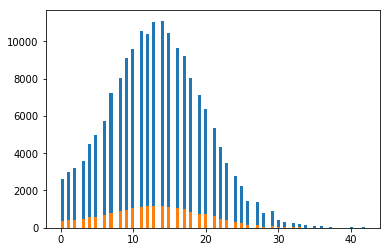

var_131


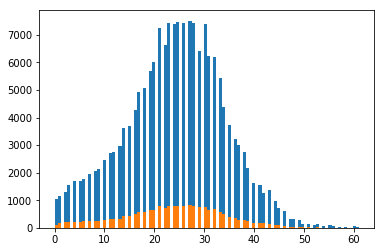

var_132


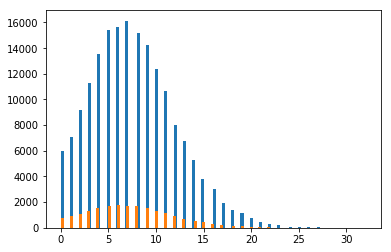

var_133


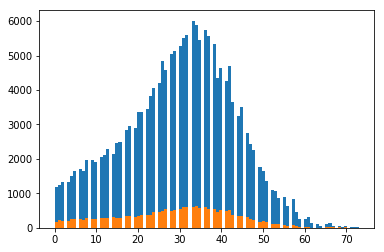

var_134


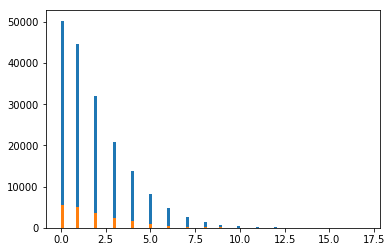

var_135


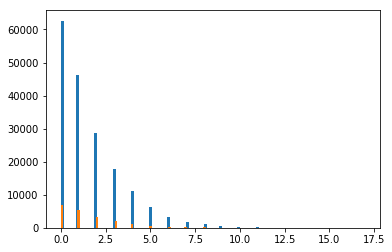

var_136


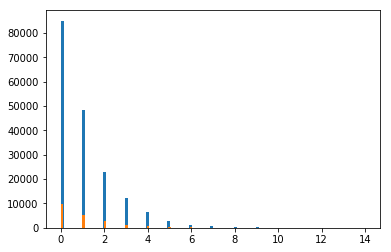

var_137


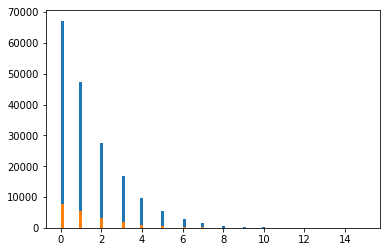

var_138


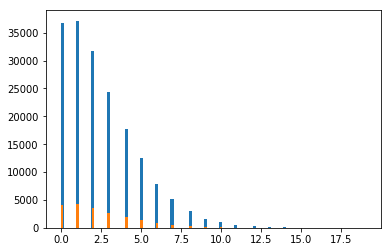

var_139


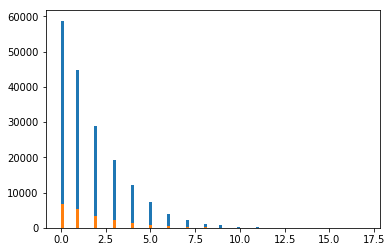

var_140


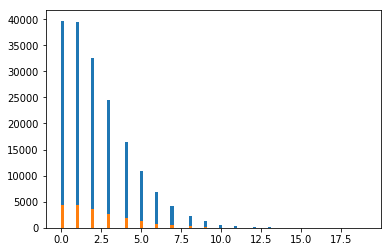

var_141


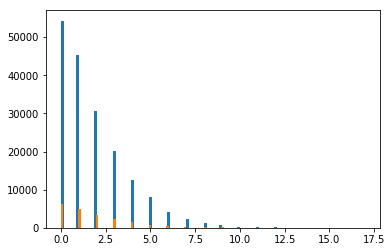

var_142


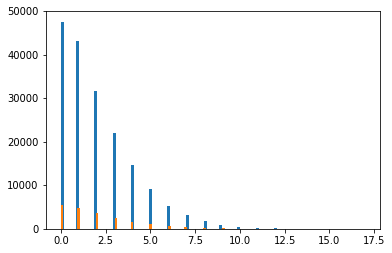

var_143


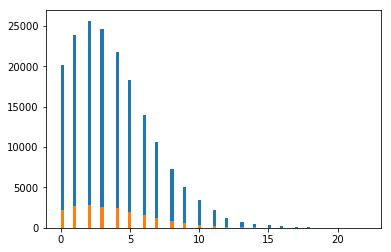

var_144


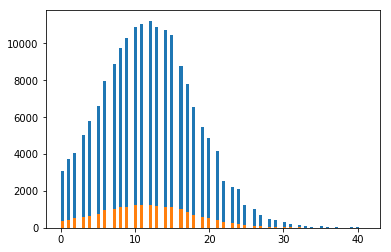

var_145


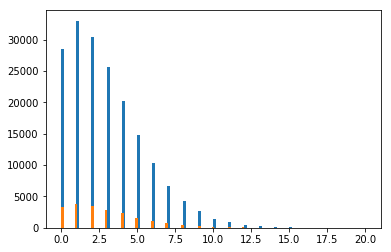

var_146


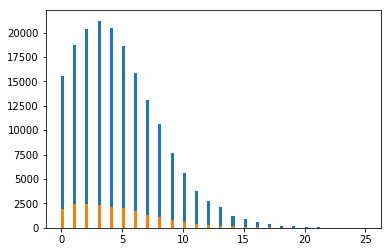

var_147


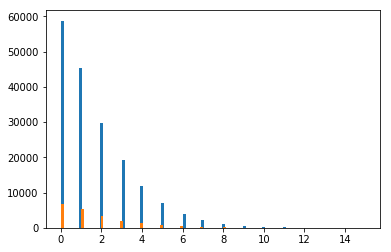

var_148


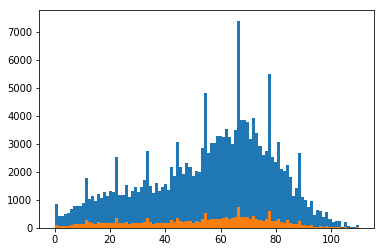

var_149


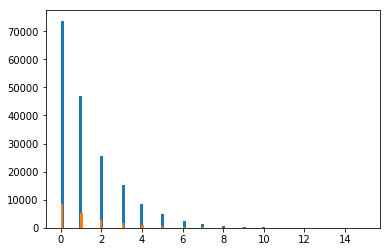

var_150


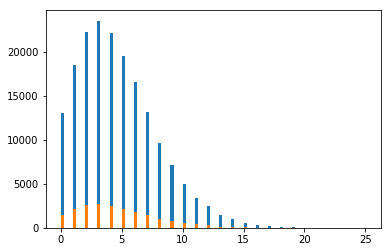

var_151


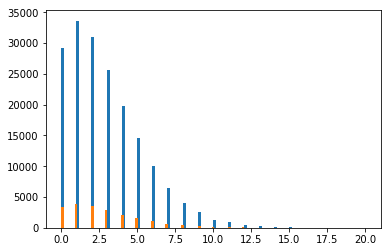

var_152


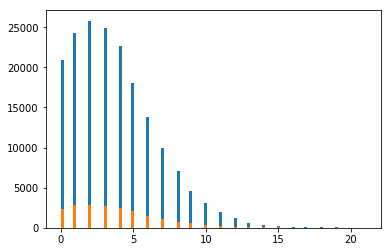

var_153


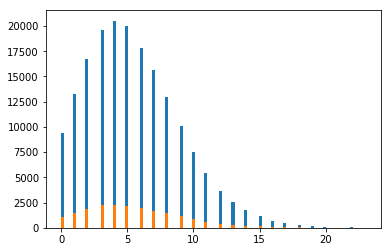

var_154


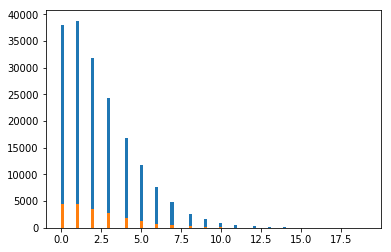

var_155


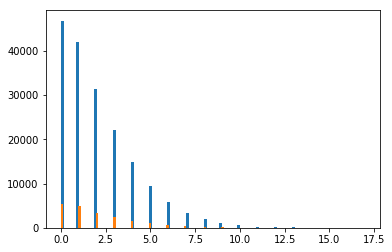

var_156


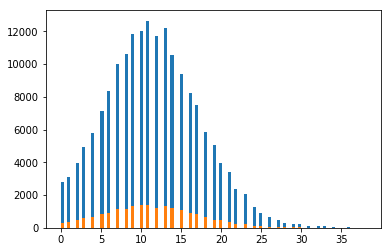

var_157


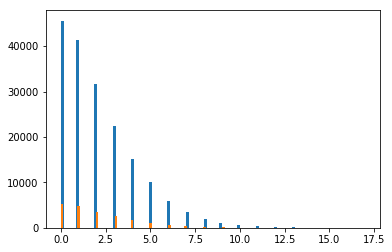

var_158


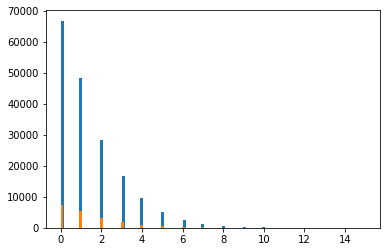

var_159


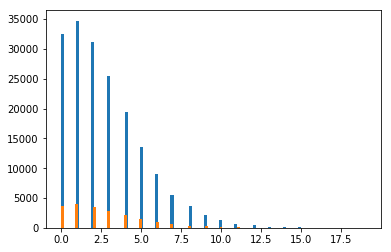

var_160


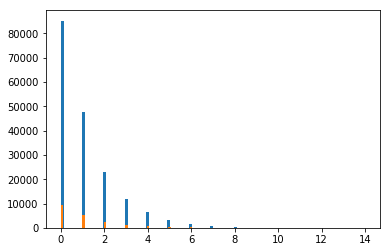

var_161


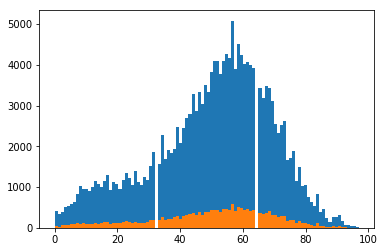

var_162


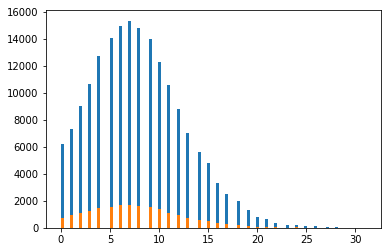

var_163


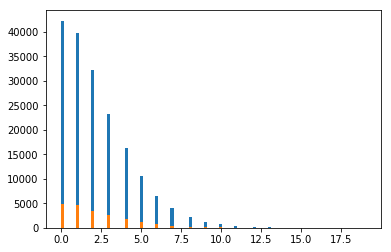

var_164


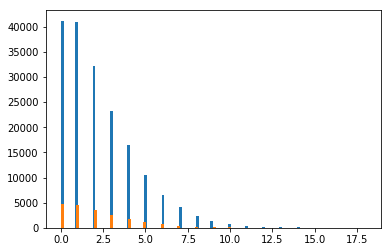

var_165


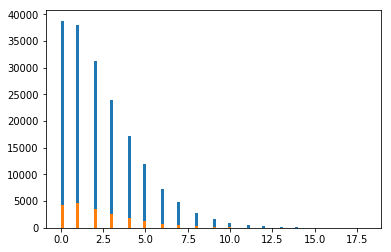

var_166


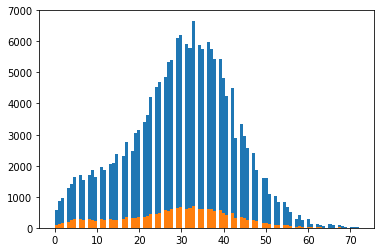

var_167


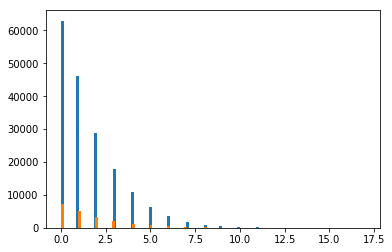

var_168


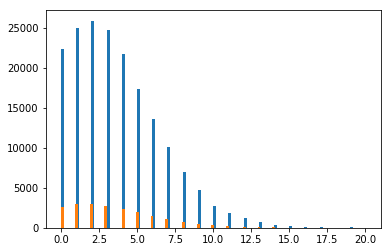

var_169


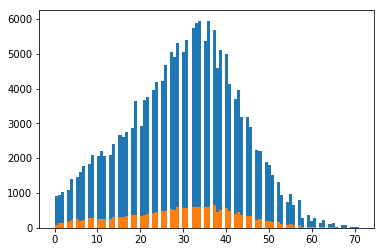

var_170


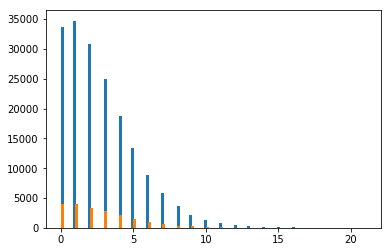

var_171


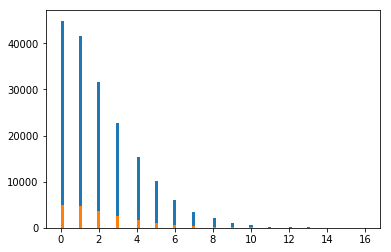

var_172


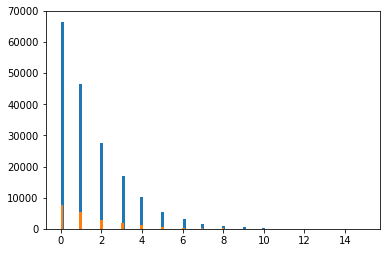

var_173


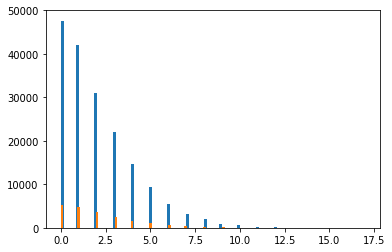

var_174


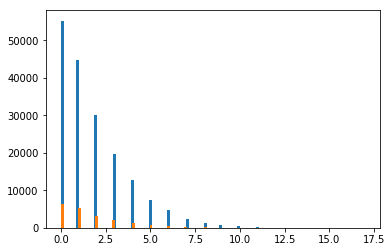

var_175


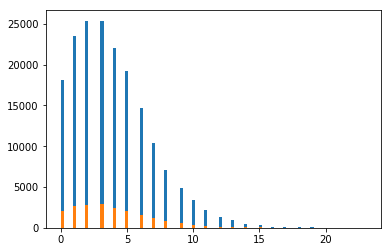

var_176


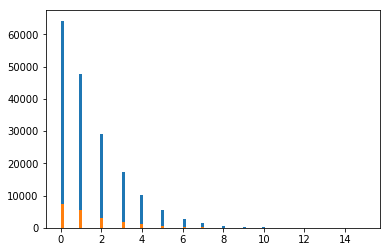

var_177


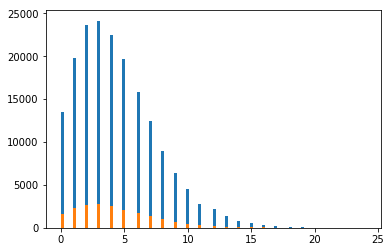

var_178


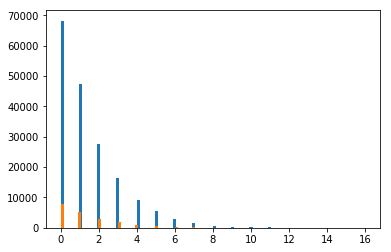

var_179


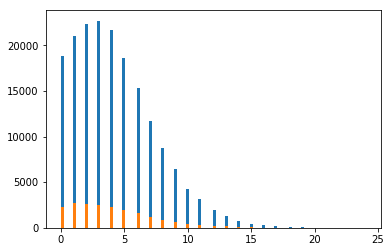

var_180


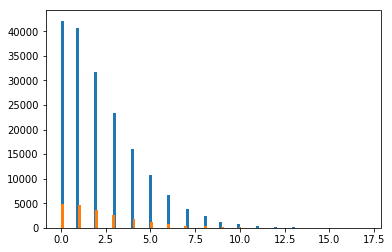

var_181


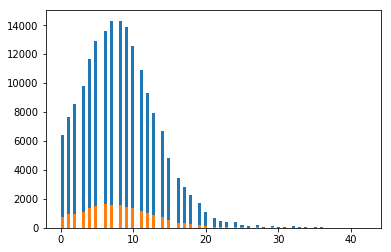

var_182


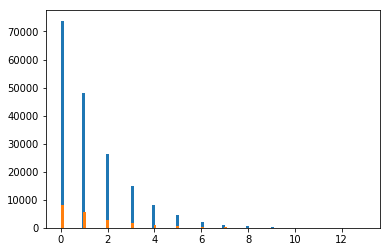

var_183


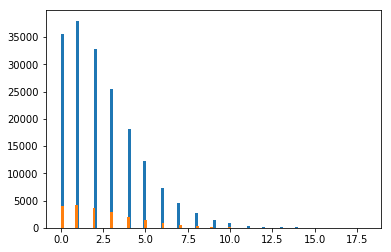

var_184


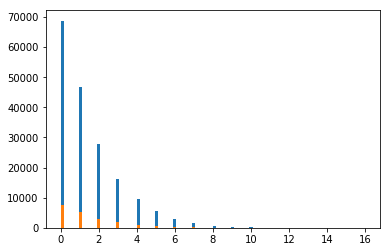

var_185


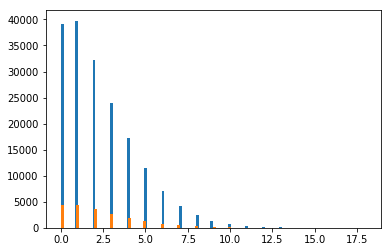

var_186


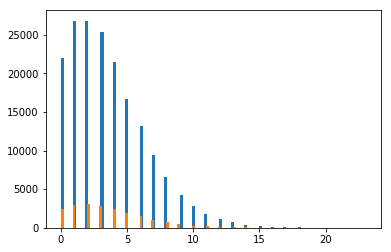

var_187


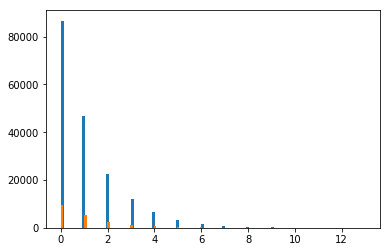

var_188


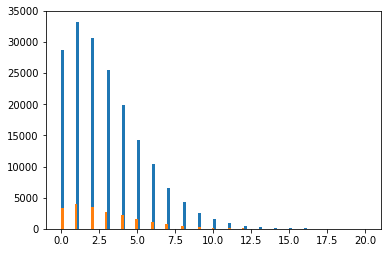

var_189


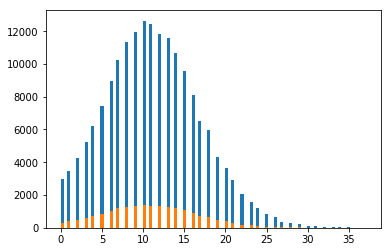

var_190


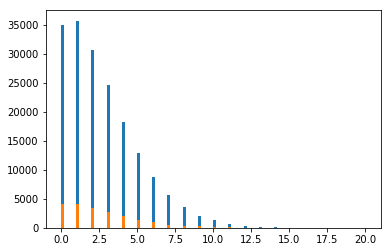

var_191


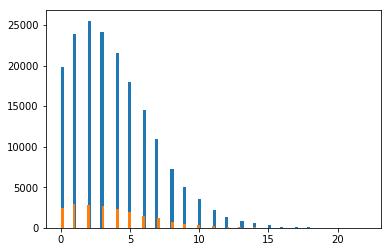

var_192


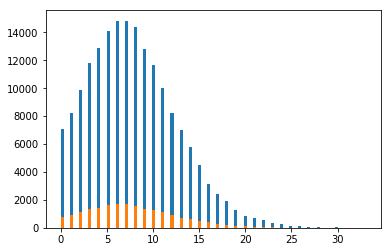

var_193


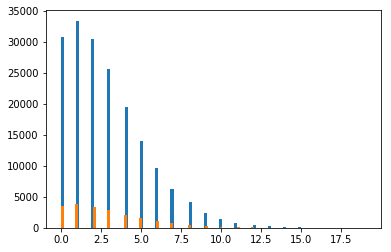

var_194


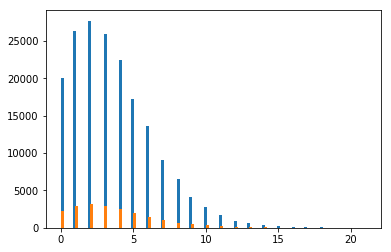

var_195


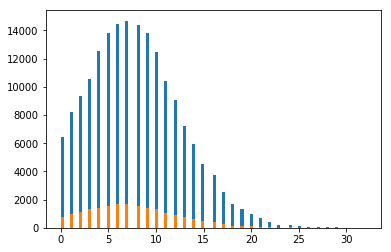

var_196


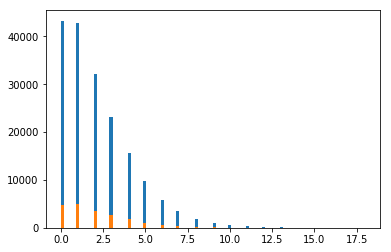

var_197


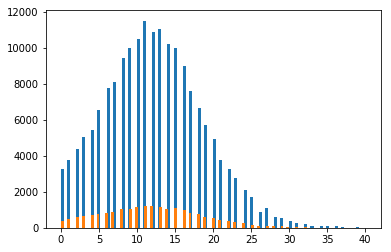

var_198


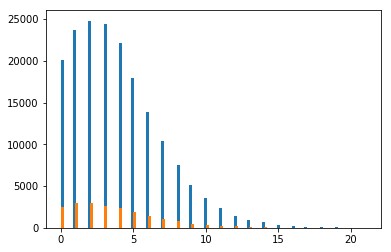

var_199


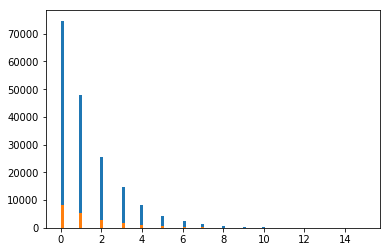

In [14]:
for col in feature_cols:
    print(col)
    plt.hist(train_0[col], bins=100)
    plt.hist(train_1[col], bins=100)
    plt.show()